In [1]:
# import trax
# from trax import layers as tl
# import trax.fastmath.numpy as fastnp
# from trax.supervised import training
from functools import partial
import numpy as np
from itertools import combinations
import random as rnd
from random import sample
import json
import sklearn.metrics as metrics
from sklearn.metrics import classification_report , confusion_matrix, roc_auc_score, confusion_matrix
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import copy
import torch
import os
import warnings
from scipy.spatial import distance
from os import walk
from transformers import AutoTokenizer, AutoModel
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#initialize codebert
tokenizer = AutoTokenizer.from_pretrained("microsoft/codebert-base")
model_codebert = AutoModel.from_pretrained("microsoft/codebert-base").to(device)
np.random.seed(777)

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split

from transformers import AutoTokenizer, AutoModel
from sklearn.model_selection import train_test_split
from os import walk

from transformers import AutoModelForCausalLM
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
import pandas as pd

# Load the dataset
file_path = "/home/riddhi/FlakyXbert/MAIN/data/IDoFT_data/IDoFT_dataset.csv"
data = pd.read_csv(file_path)

# Calculate project counts and filter only those with more than 30 entries
project_counts = data['project'].value_counts()
filtered_projects = project_counts[project_counts > 30]

# Filter the data to include only the selected projects
filtered_data = data[data['project'].isin(filtered_projects.index)]

# Group by 'project' and 'category' to get counts of each category within each project
category_counts = filtered_data.groupby(['project', 'category']).size().unstack(fill_value=0)

# Create a DataFrame for project counts to ensure it has a compatible index for joining
project_counts_df = pd.DataFrame(filtered_projects)
project_counts_df.columns = ['project_count']

# Reset index to ensure 'project' is a column for a proper join
project_counts_df.reset_index(inplace=True)
category_counts.reset_index(inplace=True)

# Merge the dataframes on 'project'
result_df = pd.merge(project_counts_df, category_counts, on='project', how='left')

# Print the resulting DataFrame
print(result_df)


                   project  project_count   0   1   2    3    4   5
0                    dubbo            170   9  19  66    7   12  57
1                   hadoop            146   0  22  85   31    8   0
2                     nifi            139   0   0  28  111    0   0
3         junit-quickcheck            131   0   0   2    7  122   0
4             ormlite-core            113   0   0  90   23    0   0
5                  admiral            109   0   7   2   75    5  20
6                  wildfly             84   0   0  43   30    1  10
7                   Mapper             75   0   0  70    5    0   0
8                 fastjson             64   2   3  16   43    0   0
9     typescript-generator             60   0   0   0   60    0   0
10          Chronicle-Wire             59   0   0   2   57    0   0
11          Java-WebSocket             54  33  21   0    0    0   0
12                 biojava             51   0  28   0   23    0   0
13             spring-boot             48   0   

In [4]:
import pandas as pd

# Load the dataset
file_path = "/home/riddhi/FlakyXbert/MAIN/data/IDoFT_data/IDoFT_dataset.csv"
data = pd.read_csv(file_path)

# Calculate project counts and filter only those with more than 30 entries
project_counts = data['project'].value_counts()
filtered_projects = project_counts[project_counts > 30]

# Filter the data to include only the selected projects
filtered_data = data[data['project'].isin(filtered_projects.index)]

# Group by 'project' and 'category' to get counts of each category within each project
category_counts = filtered_data.groupby(['project', 'category']).size().unstack(fill_value=0)

# Create a DataFrame for project counts to ensure it has a compatible index for joining
project_counts_df = pd.DataFrame(filtered_projects)
project_counts_df.columns = ['project_count']

# Reset index to ensure 'project' is a column for a proper join
project_counts_df.reset_index(inplace=True)
category_counts.reset_index(inplace=True)

# Merge the dataframes on 'project'
result_df = pd.merge(project_counts_df, category_counts, on='project', how='left')

# Print the resulting DataFrame
print(result_df)


                   project  project_count   0   1   2    3    4   5
0                    dubbo            170   9  19  66    7   12  57
1                   hadoop            146   0  22  85   31    8   0
2                     nifi            139   0   0  28  111    0   0
3         junit-quickcheck            131   0   0   2    7  122   0
4             ormlite-core            113   0   0  90   23    0   0
5                  admiral            109   0   7   2   75    5  20
6                  wildfly             84   0   0  43   30    1  10
7                   Mapper             75   0   0  70    5    0   0
8                 fastjson             64   2   3  16   43    0   0
9     typescript-generator             60   0   0   0   60    0   0
10          Chronicle-Wire             59   0   0   2   57    0   0
11          Java-WebSocket             54  33  21   0    0    0   0
12                 biojava             51   0  28   0   23    0   0
13             spring-boot             48   0   

In [5]:
import pandas as pd

# Load the dataset
file_path = "/home/riddhi/FlakyXbert/MAIN/data/IDoFT_data/IDoFT_dataset.csv"
data = pd.read_csv(file_path)

# Get the count of unique values in the 'projects' column
unique_projects_counts = data['project'].value_counts()

# Filter and display the projects with more than 300 counts
filtered_projects = unique_projects_counts[unique_projects_counts > 30]
print(filtered_projects)


project
dubbo                     170
hadoop                    146
nifi                      139
junit-quickcheck          131
ormlite-core              113
admiral                   109
wildfly                    84
Mapper                     75
fastjson                   64
typescript-generator       60
Chronicle-Wire             59
Java-WebSocket             54
biojava                    51
spring-boot                48
visualee                   47
hbase                      47
innodb-java-reader         45
adyen-java-api-library     45
spring-hateoas             41
hive                       41
DataflowTemplates          39
esper                      38
spring-data-r2dbc          37
openhtmltopdf              35
nacos                      32
Name: count, dtype: int64


In [6]:
label_to_int_pre= {
    'OD': 0,
    'NIO': 1,
    'ID': 2,
    'NDOD': 3,
    'NOD': 4,
    'UD':5
}
int_to_label_pre = {
    0: 'OD',
    1: 'NIO',
    2: 'ID',
    3: 'NDOD',
    4: 'NOD',
    5: 'UD',
}

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame that includes all the data
# Load the dataset
file_path = "/home/riddhi/FlakyXbert/MAIN/data/IDoFT_data/IDoFT_dataset.csv"
data = pd.read_csv(file_path)

# Specify the project name you want to include
project_name = "biojava"

# Assuming 'data' is your DataFrame that includes all the data
project_data = data[data['project'] == project_name]

# Extract the relevant fields: 'preprocessed_code' and 'category'
relevant_data = project_data[['preprocessed_code', 'category']]

# Filter the data to include only categories 1, 2, 3, and 4 (up to 5 if needed)
filtered_data = relevant_data[relevant_data['category'].isin([1, 3])]

# Split the data into training and validation sets, stratifying by 'category' to ensure all categories are represented
train_data, valid_data = train_test_split(filtered_data, test_size=0.2, random_state=42, stratify=filtered_data['category'])

# Mapping from integers to labels

# Replace category numbers with category labels
train_data['category'] = train_data['category'].map(int_to_label_pre)
valid_data['category'] = valid_data['category'].map(int_to_label_pre)

# Extract buggy code and categories for train and validation sets
train_buggy_code = train_data['preprocessed_code'].tolist()
valid_buggy_code = valid_data['preprocessed_code'].tolist()
train_categories = train_data['category'].tolist()
valid_categories = valid_data['category'].tolist()

# Print the splits for verification
print("Train buggy code:", len(train_buggy_code))
print("Validation buggy code:", len(valid_buggy_code))
print("Train categories:", len(train_categories))
print("Validation categories:", len(valid_categories))


Train buggy code: 40
Validation buggy code: 11
Train categories: 40
Validation categories: 11


In [8]:
print("Unique categories in training set:", set(train_categories))
print("Unique categories in validation set:", set(valid_categories))


Unique categories in training set: {'NIO', 'NDOD'}
Unique categories in validation set: {'NIO', 'NDOD'}


In [9]:
label_to_int= {
    'NIO': 0,
    'NDOD': 1
    }

In [10]:
from torch.utils.data import Dataset
import numpy as np
import random
import torch

class SiameseDataset(Dataset):
    def __init__(self, train_buggy_code, valid_buggy_code, tokenizer, codebert, categories, split):
        self.train_buggy_code = train_buggy_code
        self.valid_buggy_code = valid_buggy_code
        self.tokenizer = tokenizer
        self.codebert = codebert.to(device)
        self.categories = categories
        self.split = split
        self.m_len = self.calculate_max_output_length()
        
        # Preprocess categories to map labels to indices
        self.label_to_indices = {}
        for index, category in enumerate(categories):
            if category not in self.label_to_indices:
                self.label_to_indices[category] = []
            self.label_to_indices[category].append(index)

        # For negative sampling
        self.labels = categories
        self.unique_labels = list(set(self.labels))
        
    def calculate_max_output_length(self):
        max_length = 0
        for code in self.train_buggy_code:
            # Simulate processing of snippets to determine the concatenated output length
            length = self.simulate_process_length(code)
            if length > max_length:
                max_length_train = length
        for code in self.valid_buggy_code:
            # Simulate processing of snippets to determine the concatenated output length
            length = self.simulate_process_length(code)
            if length > max_length:
                max_length_valid = length
        if max_length_train > max_length_valid:
            return max_length_train
        else:
            return max_length_valid

    def simulate_process_length(self, snippet):
        # Calculate how many segments would be needed
        encoded_input = self.tokenizer.encode(snippet, add_special_tokens=True)
        # Each segment processes up to 512 tokens (max length for BERT models)
        num_segments = (len(encoded_input) + 511) // 512  # 512 tokens per segment, including CLS and SEP
        return num_segments * 768
    def __len__(self):
        if self.split == 'train':
            return len(self.train_buggy_code)
        else:
            return len(self.valid_buggy_code)

    def __getitem__(self, idx):
        if self.split == 'train':
            # Anchor label
            anchor_label = self.categories[idx]

            # Positive sample
            positive_idx = idx
            while positive_idx == idx:  # Ensure different indices for anchor and positive
                positive_idx = random.choice(self.label_to_indices[anchor_label])

            # Negative sample
            negative_label = random.choice([lab for lab in self.unique_labels if lab != anchor_label])
            negative_idx = random.choice(self.label_to_indices[negative_label])

            anchor = self._process_snippet(self.train_buggy_code[idx])
            positive = self._process_snippet(self.train_buggy_code[positive_idx])
            negative = self._process_snippet(self.train_buggy_code[negative_idx])
            
            if len(anchor) <= 768:
                short_data = True
            else:
                short_data = False
                


            return {
                'anchor': torch.nn.functional.pad(anchor, (0, self.m_len - anchor.size(0))),
                'positive':torch.nn.functional.pad(positive, (0, self.m_len - positive.size(0))),
                'negative': torch.nn.functional.pad(negative, (0, self.m_len - negative.size(0))),
                'label': label_to_int[anchor_label],  # Optional, depends on how you want to use it
                'short_data_flag': short_data
            }
        elif self.split == 'val':
            anchor_label = self.categories[idx]
            anchor = self._process_snippet(self.valid_buggy_code[idx])
            
            return {
                'anchor': torch.nn.functional.pad(anchor, (0, self.m_len - anchor.size(0))),
                'label': label_to_int[anchor_label]  # Optional, depends on how you want to use it
            }

        
    def _process_snippet(self, snippet):
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        # Tokenize input without the max_length constraint
        inputs = self.tokenizer(snippet, return_tensors='pt').to(device)

        if inputs['input_ids'].shape[1] < 512:
            with torch.no_grad():
                outs = self.codebert(**inputs)
            cls = outs.last_hidden_state[:, 0, :].squeeze().detach()
            return cls  # Move to CPU to save GPU memory
        else:
            total_length = inputs['input_ids'].shape[1]
            parts = []
            step_size = 100
            chunk_size = 512

            for start_index in range(0, total_length, step_size):
                end_index = min(start_index + chunk_size, total_length)
                input_segment = {key: val[:, start_index:end_index].to(device) for key, val in inputs.items()}

                with torch.no_grad():
                    output_segment = self.codebert(**input_segment)
                cls_segment = output_segment.last_hidden_state[:, 0, :].squeeze().detach()
                parts.append(cls_segment)  # Move to CPU

            concatenated_parts = torch.cat(parts, dim=0)
            return concatenated_parts

In [11]:
# Create instances of the custom dataset class
train_dataset = SiameseDataset(train_buggy_code, valid_buggy_code, tokenizer, model_codebert, train_categories, 'train')
val_dataset = SiameseDataset(train_buggy_code, valid_buggy_code, tokenizer, model_codebert, valid_categories, 'val')

# Create dataloaders for training and validation
batch_size = 8
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

# Print the lengths of the dataloaders for verification
print("Train dataloader length:", len(train_dataloader))
print("Validation dataloader length:", len(val_dataloader))

Token indices sequence length is longer than the specified maximum sequence length for this model (836 > 512). Running this sequence through the model will result in indexing errors


Train dataloader length: 5
Validation dataloader length: 2


In [12]:
import numpy as np

def sample_triplet_data(data, sample_size_ratio):
    """
    Samples a subset of triplet data (anchor, positive, negative) while preserving class distribution.
    
    Parameters:
    - data: list of dictionaries, where each dictionary has keys 'anchor', 'positive', 'negative', 'label'.
    - sample_size_ratio: float, the fraction of the data to sample (0 < sample_size_ratio <= 1).
    
    Returns:
    - sampled_data: list of dictionaries, the sampled subset of the original data.
    """
    # Extract labels to understand the class distribution
    labels = [item['label'] for item in data]
    unique_classes = np.unique(labels)
    
    sampled_data = []
    
    for cls in unique_classes:
        # Find all items belonging to the current class
        class_items = [item for item in data if item['label'] == cls]
        # Calculate the number of items to sample from this class
        num_samples = int(np.ceil(len(class_items) * sample_size_ratio))
        # Randomly sample items without replacement
        sampled_items = np.random.choice(class_items, size=num_samples, replace=False)
        # Append the sampled items to the output list
        sampled_data.extend(sampled_items)
    
    # Optionally, shuffle the sampled dataset to mix classes
    np.random.shuffle(sampled_data)

    return sampled_data


In [13]:
import gc
from tqdm import tqdm
plot_data = []
plot_labels = []
short_data_flags = []
for item in tqdm(train_dataset):
    
    plot_data.append(item['anchor'])
    plot_labels.append(item['label'])
    short_data_flags.append(item['short_data_flag'])

  2%|▎         | 1/40 [00:00<00:07,  5.10it/s]

100%|██████████| 40/40 [00:00<00:00, 64.64it/s]


In [14]:
m_len = plot_data[0].shape[0]

In [15]:
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'orchid', 'grey']  
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
# Create a custom colormap
cc = LinearSegmentedColormap.from_list("cc", colors, N=5)


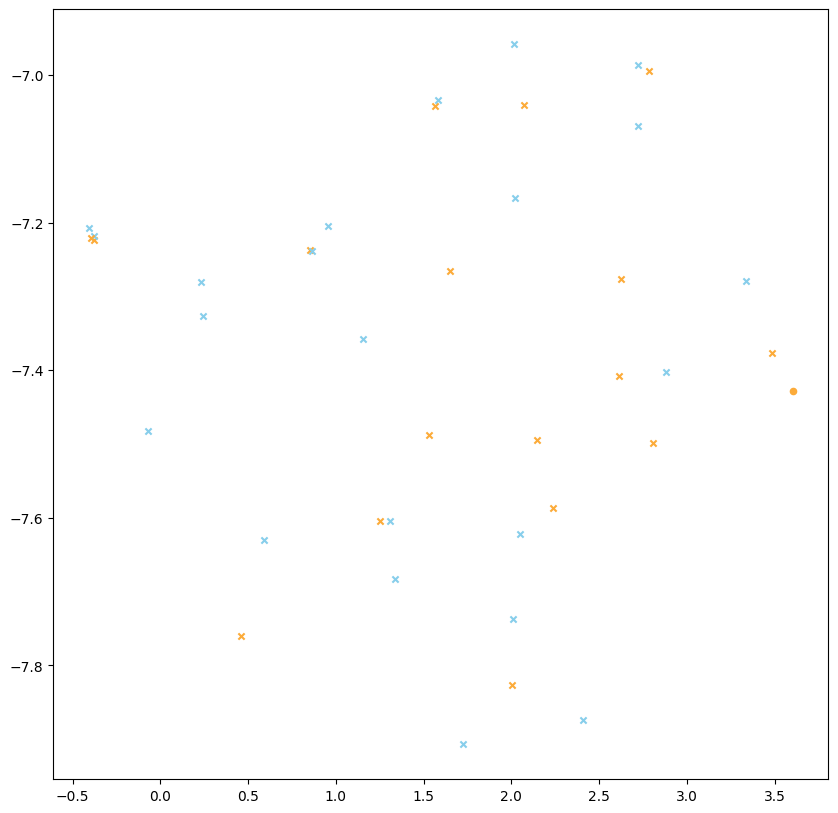

In [16]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import torch
import numpy as np

# Assuming X, plot_data, and plot_labels are defined as before
# Also assuming bool_values is your list/array of boolean values

X = torch.stack(plot_data).cpu().numpy()

# Extract labels for each point
labelsNums = plot_labels

# Perform t-SNE dimensionality reduction
X_embedded = TSNE(n_components=2, init='random').fit_transform(X)

# Assuming 'cc' is a colormap, you might need to adjust this to fit your actual colormap variable
# Generate an array of colors for each label
unique_labels = np.unique(labelsNums)
colors = plt.cm.get_cmap(cc, len(unique_labels))  # Adjust 'cc' as needed to your colormap name
label_to_color = {label: colors(i / len(unique_labels)) for i, label in enumerate(unique_labels)}
colors_array = np.array([label_to_color[label] for label in labelsNums])

# Create the scatter plot
plt.figure(figsize=(10, 10))

# Iterate through each datapoint
for i in range(len(X_embedded)):
    marker = 'x' if short_data_flags[i] else 'o'  # Choose the marker based on the boolean value
    plt.scatter(X_embedded[i, 0], X_embedded[i, 1], color=colors_array[i], s=20, alpha=1, marker=marker)

# Set the background color to black
# plt.gca().set_facecolor('white')
# # Adjust the color of the ticks and labels for better visibility
# plt.tick_params(axis='x', colors='white')
# plt.tick_params(axis='y', colors='white')
# plt.xlabel('Component 1', color='white')
# plt.ylabel('Component 2', color='white')

plt.show()


In [17]:
# Load the CodeBERT tokenizer (adjust the model_name as needed)
model_name = "microsoft/codebert-base"
codebert_model = AutoModel.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)


class SiameseNetwork(nn.Module):
    def __init__(self, embedding_size):
        super(SiameseNetwork, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(embedding_size, int(embedding_size/2)),
            nn.ReLU(inplace=True),
            nn.Linear(int(embedding_size/2), int(embedding_size/4)),
            nn.ReLU(inplace=True),
            nn.Linear(int(embedding_size/4), embedding_size)
        )

    def forward(self, x):
        output = self.fc(x)
        return output

In [18]:
class TripletLoss(nn.Module):
    def __init__(self, margin=1.0):
        super(TripletLoss, self).__init__()
        self.margin = margin

    def forward(self, anchor, positive, negative):
        distance_positive = (anchor - positive).pow(2).sum(1)
        distance_negative = (anchor - negative).pow(2).sum(1)
        losses = torch.relu(distance_positive - distance_negative + self.margin)
        return losses.mean()

In [19]:
learning_rate = 1e-5
num_epochs = 450
embed_size = m_len  # This should match the output size of CodeBERT
siamese_network = SiameseNetwork(embed_size).to(device)
criterion = TripletLoss(margin=1.0)
optimizer = optim.Adam(siamese_network.parameters(), lr=learning_rate)
triplet_loss = TripletLoss().to(device)

In [20]:
# from transformers import get_linear_schedule_with_warmup
# warmup_Frac = 0.1
# total_iter = num_epochs * len(train_dataloader)
# scheduler = get_linear_schedule_with_warmup(optimizer, int(warmup_Frac * total_iter), total_iter)

In [21]:
from tqdm import tqdm
best_loss = 100.0
num_epochs = 400
epoch_loss_list = []
model_name = "FlakyXbert_IDoFT_project_" + project_name + '_final.pth'
for epoch in range(num_epochs):
    total_loss = 0.0
    siamese_network.train()
    for batch in tqdm(train_dataloader):

        labels = (batch['label']).to(device)
        batch_anchor = (batch['anchor']).to(device)
        batch_positive = (batch['positive']).to(device)
        batch_negative = (batch['negative']).to(device)

        anchor_output = siamese_network(batch_anchor)
        positive_out = siamese_network(batch_positive)
        negative_out = siamese_network(batch_negative)

        loss = criterion(anchor_output, positive_out, negative_out)
        optimizer.zero_grad()
        loss.backward()
        # torch.nn.utils.clip_grad_norm_(siamese_network.parameters(), max_norm=2.0)        
        optimizer.step()
        # scheduler.step()

        total_loss += loss.item()
        if total_loss <= best_loss:
            # print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss / len(train_dataloader)}")
            print("Loss improved saving model")
            torch.save(siamese_network.state_dict(), model_name)
            best_loss = total_loss
        
            
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss / len(train_dataloader)}")
    # The line `epoch_loss_list.append(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss / len(train_dataloader)}")` is attempting to append a formatted string to a list named `epoch_loss_list`. This string contains information about the current epoch number, total number of epochs, and the average loss calculated for that epoch. However, in the provided code snippet, the `epoch_loss_list` list is not defined or used anywhere else in the code.
    epoch_loss_list.append(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss / len(train_dataloader)}")
    

 20%|██        | 1/5 [00:00<00:00,  6.20it/s]

 60%|██████    | 3/5 [00:00<00:00, 11.21it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 11.97it/s]


Epoch 1/400, Loss: 1.0068100571632386


 40%|████      | 2/5 [00:00<00:00, 12.80it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 11.40it/s]


Epoch 2/400, Loss: 0.9974530577659607


 20%|██        | 1/5 [00:00<00:00,  7.89it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 12.52it/s]


Epoch 3/400, Loss: 0.9397302508354187


100%|██████████| 5/5 [00:00<00:00, 13.50it/s]


Epoch 4/400, Loss: 1.0338565349578857


100%|██████████| 5/5 [00:00<00:00, 11.41it/s]


Epoch 5/400, Loss: 0.9821910262107849


 40%|████      | 2/5 [00:00<00:00, 10.53it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 12.07it/s]


Epoch 6/400, Loss: 0.9434001326560975


100%|██████████| 5/5 [00:00<00:00, 12.53it/s]


Epoch 7/400, Loss: 1.0352231740951539


100%|██████████| 5/5 [00:00<00:00, 12.38it/s]


Epoch 8/400, Loss: 0.9804389357566834


 20%|██        | 1/5 [00:00<00:00,  7.75it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 12.34it/s]


Epoch 9/400, Loss: 0.9844917416572571


100%|██████████| 5/5 [00:00<00:00, 14.85it/s]


Epoch 10/400, Loss: 0.9757558584213257


100%|██████████| 5/5 [00:00<00:00, 12.32it/s]


Epoch 11/400, Loss: 1.006037986278534


100%|██████████| 5/5 [00:00<00:00, 11.47it/s]


Epoch 12/400, Loss: 0.9731934428215027


100%|██████████| 5/5 [00:00<00:00, 12.41it/s]


Epoch 13/400, Loss: 0.9765729904174805


100%|██████████| 5/5 [00:00<00:00, 11.33it/s]


Epoch 14/400, Loss: 0.939171314239502


100%|██████████| 5/5 [00:00<00:00, 10.77it/s]


Epoch 15/400, Loss: 1.001722526550293


100%|██████████| 5/5 [00:00<00:00,  9.96it/s]


Epoch 16/400, Loss: 1.0065378427505494


100%|██████████| 5/5 [00:00<00:00, 11.45it/s]


Epoch 17/400, Loss: 0.9469117641448974


100%|██████████| 5/5 [00:00<00:00, 11.20it/s]


Epoch 18/400, Loss: 0.9240601539611817


100%|██████████| 5/5 [00:00<00:00, 12.12it/s]


Epoch 19/400, Loss: 0.9846269845962524


100%|██████████| 5/5 [00:00<00:00, 13.41it/s]


Epoch 20/400, Loss: 1.0640201687812805


100%|██████████| 5/5 [00:00<00:00, 13.80it/s]


Epoch 21/400, Loss: 1.004248857498169


100%|██████████| 5/5 [00:00<00:00, 10.72it/s]


Epoch 22/400, Loss: 1.1143747448921204


100%|██████████| 5/5 [00:00<00:00, 14.69it/s]


Epoch 23/400, Loss: 0.9265966176986694


100%|██████████| 5/5 [00:00<00:00, 15.00it/s]


Epoch 24/400, Loss: 1.018028938770294


100%|██████████| 5/5 [00:00<00:00, 12.48it/s]


Epoch 25/400, Loss: 0.9255616664886475


100%|██████████| 5/5 [00:00<00:00, 13.53it/s]


Epoch 26/400, Loss: 1.035014808177948


100%|██████████| 5/5 [00:00<00:00, 10.77it/s]


Epoch 27/400, Loss: 0.956969952583313


100%|██████████| 5/5 [00:00<00:00, 14.63it/s]


Epoch 28/400, Loss: 0.967333459854126


100%|██████████| 5/5 [00:00<00:00, 14.94it/s]


Epoch 29/400, Loss: 0.9878210306167603


100%|██████████| 5/5 [00:00<00:00, 11.54it/s]


Epoch 30/400, Loss: 1.0095774292945863


100%|██████████| 5/5 [00:00<00:00, 10.87it/s]


Epoch 31/400, Loss: 1.018450176715851


100%|██████████| 5/5 [00:00<00:00, 12.48it/s]


Epoch 32/400, Loss: 0.9443227171897888


100%|██████████| 5/5 [00:00<00:00, 13.21it/s]


Epoch 33/400, Loss: 0.9824600458145142


100%|██████████| 5/5 [00:00<00:00, 12.41it/s]


Epoch 34/400, Loss: 0.9583214282989502


100%|██████████| 5/5 [00:00<00:00, 11.43it/s]


Epoch 35/400, Loss: 0.8915205836296082


  0%|          | 0/5 [00:00<?, ?it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 12.39it/s]


Epoch 36/400, Loss: 0.9497966051101685


100%|██████████| 5/5 [00:00<00:00, 10.20it/s]


Epoch 37/400, Loss: 1.0037583351135253


100%|██████████| 5/5 [00:00<00:00, 13.25it/s]


Epoch 38/400, Loss: 0.9618833422660827


100%|██████████| 5/5 [00:00<00:00, 12.25it/s]


Epoch 39/400, Loss: 0.9561540007591247


100%|██████████| 5/5 [00:00<00:00, 12.60it/s]


Epoch 40/400, Loss: 1.0101735234260558


100%|██████████| 5/5 [00:00<00:00, 10.11it/s]


Epoch 41/400, Loss: 1.0474638938903809


100%|██████████| 5/5 [00:00<00:00, 12.54it/s]


Epoch 42/400, Loss: 1.0225554585456849


100%|██████████| 5/5 [00:00<00:00, 12.42it/s]


Epoch 43/400, Loss: 0.9520911335945129


100%|██████████| 5/5 [00:00<00:00, 13.65it/s]


Epoch 44/400, Loss: 0.9550687193870544


100%|██████████| 5/5 [00:00<00:00, 12.65it/s]


Epoch 45/400, Loss: 0.9994285821914672


100%|██████████| 5/5 [00:00<00:00, 12.20it/s]


Epoch 46/400, Loss: 1.0027289152145387


100%|██████████| 5/5 [00:00<00:00, 13.37it/s]


Epoch 47/400, Loss: 0.9365931034088135


100%|██████████| 5/5 [00:00<00:00, 12.50it/s]


Epoch 48/400, Loss: 0.9487263083457946


100%|██████████| 5/5 [00:00<00:00, 12.48it/s]


Epoch 49/400, Loss: 0.9988946437835693


100%|██████████| 5/5 [00:00<00:00, 11.68it/s]


Epoch 50/400, Loss: 0.963019597530365


100%|██████████| 5/5 [00:00<00:00, 10.12it/s]


Epoch 51/400, Loss: 1.0209441661834717


100%|██████████| 5/5 [00:00<00:00, 10.87it/s]


Epoch 52/400, Loss: 0.9019289612770081


100%|██████████| 5/5 [00:00<00:00, 11.62it/s]


Epoch 53/400, Loss: 0.9903479218482971


100%|██████████| 5/5 [00:00<00:00, 10.12it/s]


Epoch 54/400, Loss: 0.9724888920783996


 20%|██        | 1/5 [00:00<00:00,  5.32it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00,  9.51it/s]


Epoch 55/400, Loss: 0.9169047355651856


100%|██████████| 5/5 [00:00<00:00, 13.60it/s]


Epoch 56/400, Loss: 0.9508333921432495


100%|██████████| 5/5 [00:00<00:00, 13.48it/s]


Epoch 57/400, Loss: 1.0101256370544434


100%|██████████| 5/5 [00:00<00:00, 12.50it/s]


Epoch 58/400, Loss: 1.0082355380058288


100%|██████████| 5/5 [00:00<00:00, 12.29it/s]


Epoch 59/400, Loss: 0.9485293745994567


100%|██████████| 5/5 [00:00<00:00, 12.76it/s]


Epoch 60/400, Loss: 1.0358234286308288


100%|██████████| 5/5 [00:00<00:00, 14.80it/s]


Epoch 61/400, Loss: 0.9705980539321899


100%|██████████| 5/5 [00:00<00:00, 13.39it/s]


Epoch 62/400, Loss: 0.9725195407867432


100%|██████████| 5/5 [00:00<00:00, 12.54it/s]


Epoch 63/400, Loss: 0.9066940784454346


100%|██████████| 5/5 [00:00<00:00, 13.49it/s]


Epoch 64/400, Loss: 1.0669541597366332


100%|██████████| 5/5 [00:00<00:00, 10.61it/s]


Epoch 65/400, Loss: 0.9594226956367493


100%|██████████| 5/5 [00:00<00:00, 12.44it/s]


Epoch 66/400, Loss: 1.022629165649414


100%|██████████| 5/5 [00:00<00:00, 11.54it/s]


Epoch 67/400, Loss: 0.9494988441467285


100%|██████████| 5/5 [00:00<00:00, 10.70it/s]


Epoch 68/400, Loss: 0.8765774726867676


100%|██████████| 5/5 [00:00<00:00, 12.33it/s]


Epoch 69/400, Loss: 0.9772189617156982


100%|██████████| 5/5 [00:00<00:00, 13.67it/s]


Epoch 70/400, Loss: 1.0003291845321656


100%|██████████| 5/5 [00:00<00:00, 13.40it/s]


Epoch 71/400, Loss: 1.0395347714424132


100%|██████████| 5/5 [00:00<00:00, 13.63it/s]


Epoch 72/400, Loss: 1.0013010382652283


100%|██████████| 5/5 [00:00<00:00, 11.42it/s]


Epoch 73/400, Loss: 0.9462579607963562


100%|██████████| 5/5 [00:00<00:00, 11.55it/s]


Epoch 74/400, Loss: 0.9446000576019287


100%|██████████| 5/5 [00:00<00:00, 12.57it/s]


Epoch 75/400, Loss: 0.9125744223594665


100%|██████████| 5/5 [00:00<00:00, 12.36it/s]


Epoch 76/400, Loss: 1.0069392561912536


100%|██████████| 5/5 [00:00<00:00, 12.36it/s]


Epoch 77/400, Loss: 0.9833155512809754


100%|██████████| 5/5 [00:00<00:00, 13.34it/s]


Epoch 78/400, Loss: 1.005696451663971


100%|██████████| 5/5 [00:00<00:00, 11.64it/s]


Epoch 79/400, Loss: 0.8960088968276978


100%|██████████| 5/5 [00:00<00:00, 13.32it/s]


Epoch 80/400, Loss: 0.9900745391845703


100%|██████████| 5/5 [00:00<00:00, 13.45it/s]


Epoch 81/400, Loss: 1.0737332582473755


100%|██████████| 5/5 [00:00<00:00, 13.63it/s]


Epoch 82/400, Loss: 0.9568341612815857


100%|██████████| 5/5 [00:00<00:00, 11.70it/s]


Epoch 83/400, Loss: 0.9469706416130066


100%|██████████| 5/5 [00:00<00:00, 13.60it/s]


Epoch 84/400, Loss: 0.9422098636627197


100%|██████████| 5/5 [00:00<00:00, 14.57it/s]


Epoch 85/400, Loss: 0.9683394432067871


100%|██████████| 5/5 [00:00<00:00, 12.47it/s]


Epoch 86/400, Loss: 0.9557873487472535


100%|██████████| 5/5 [00:00<00:00, 10.80it/s]


Epoch 87/400, Loss: 1.0137619853019715


100%|██████████| 5/5 [00:00<00:00, 12.38it/s]


Epoch 88/400, Loss: 0.9927240610122681


100%|██████████| 5/5 [00:00<00:00, 13.65it/s]


Epoch 89/400, Loss: 0.8979101181030273


100%|██████████| 5/5 [00:00<00:00, 11.35it/s]


Epoch 90/400, Loss: 0.9984542250633239


100%|██████████| 5/5 [00:00<00:00, 11.71it/s]


Epoch 91/400, Loss: 0.9143446564674378


100%|██████████| 5/5 [00:00<00:00, 13.78it/s]


Epoch 92/400, Loss: 0.9760112643241883


100%|██████████| 5/5 [00:00<00:00, 12.50it/s]


Epoch 93/400, Loss: 1.0152925372123718


100%|██████████| 5/5 [00:00<00:00, 13.43it/s]


Epoch 94/400, Loss: 0.9569391727447509


100%|██████████| 5/5 [00:00<00:00, 11.59it/s]


Epoch 95/400, Loss: 1.0127459526062013


100%|██████████| 5/5 [00:00<00:00, 13.79it/s]


Epoch 96/400, Loss: 0.9459852457046509


100%|██████████| 5/5 [00:00<00:00, 11.70it/s]


Epoch 97/400, Loss: 0.9094112873077392


100%|██████████| 5/5 [00:00<00:00, 14.75it/s]


Epoch 98/400, Loss: 0.9813030123710632


100%|██████████| 5/5 [00:00<00:00, 12.47it/s]


Epoch 99/400, Loss: 0.9372882723808289


100%|██████████| 5/5 [00:00<00:00, 13.73it/s]


Epoch 100/400, Loss: 0.951842975616455


100%|██████████| 5/5 [00:00<00:00, 13.46it/s]


Epoch 101/400, Loss: 0.9159016370773315


100%|██████████| 5/5 [00:00<00:00, 13.57it/s]


Epoch 102/400, Loss: 0.947269856929779


100%|██████████| 5/5 [00:00<00:00, 14.67it/s]


Epoch 103/400, Loss: 0.9459770202636719


100%|██████████| 5/5 [00:00<00:00, 12.47it/s]


Epoch 104/400, Loss: 1.022171640396118


100%|██████████| 5/5 [00:00<00:00, 10.01it/s]


Epoch 105/400, Loss: 0.8959707736968994


100%|██████████| 5/5 [00:00<00:00, 11.68it/s]


Epoch 106/400, Loss: 0.930045485496521


100%|██████████| 5/5 [00:00<00:00, 13.56it/s]


Epoch 107/400, Loss: 0.9469849944114686


100%|██████████| 5/5 [00:00<00:00, 13.44it/s]


Epoch 108/400, Loss: 0.9701385259628296


100%|██████████| 5/5 [00:00<00:00, 13.67it/s]


Epoch 109/400, Loss: 0.996898865699768


100%|██████████| 5/5 [00:00<00:00,  9.65it/s]


Epoch 110/400, Loss: 0.9338356494903565


100%|██████████| 5/5 [00:00<00:00, 10.67it/s]


Epoch 111/400, Loss: 1.0428113698959351


100%|██████████| 5/5 [00:00<00:00, 12.53it/s]


Epoch 112/400, Loss: 0.8971349000930786


100%|██████████| 5/5 [00:00<00:00, 11.52it/s]


Epoch 113/400, Loss: 1.0407475233078003


100%|██████████| 5/5 [00:00<00:00, 13.71it/s]


Epoch 114/400, Loss: 0.9265384197235107


100%|██████████| 5/5 [00:00<00:00, 13.71it/s]


Epoch 115/400, Loss: 0.8976239800453186


100%|██████████| 5/5 [00:00<00:00, 10.76it/s]


Epoch 116/400, Loss: 0.8431943178176879


100%|██████████| 5/5 [00:00<00:00, 13.64it/s]


Epoch 117/400, Loss: 0.9015070915222168


100%|██████████| 5/5 [00:00<00:00, 14.35it/s]


Epoch 118/400, Loss: 0.9950950145721436


100%|██████████| 5/5 [00:00<00:00, 13.06it/s]


Epoch 119/400, Loss: 0.9017746806144714


100%|██████████| 5/5 [00:00<00:00, 12.39it/s]


Epoch 120/400, Loss: 0.8475516080856323


100%|██████████| 5/5 [00:00<00:00, 11.46it/s]


Epoch 121/400, Loss: 0.8383589863777161


100%|██████████| 5/5 [00:00<00:00, 11.31it/s]


Epoch 122/400, Loss: 0.9070609211921692


100%|██████████| 5/5 [00:00<00:00, 11.57it/s]


Epoch 123/400, Loss: 0.8461463809013366


100%|██████████| 5/5 [00:00<00:00, 12.37it/s]


Epoch 124/400, Loss: 0.9324045240879059


100%|██████████| 5/5 [00:00<00:00, 13.42it/s]


Epoch 125/400, Loss: 0.8423524141311646


100%|██████████| 5/5 [00:00<00:00, 10.73it/s]


Epoch 126/400, Loss: 0.7660974621772766


100%|██████████| 5/5 [00:00<00:00, 12.67it/s]


Epoch 127/400, Loss: 0.857192850112915


100%|██████████| 5/5 [00:00<00:00, 11.34it/s]


Epoch 128/400, Loss: 0.9341156482696533


100%|██████████| 5/5 [00:00<00:00, 10.77it/s]


Epoch 129/400, Loss: 0.949102771282196


 20%|██        | 1/5 [00:00<00:00,  6.52it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 12.47it/s]


Epoch 130/400, Loss: 0.8105329513549805


100%|██████████| 5/5 [00:00<00:00, 10.70it/s]


Epoch 131/400, Loss: 0.8170655488967895


100%|██████████| 5/5 [00:00<00:00, 12.35it/s]


Epoch 132/400, Loss: 0.8863809704780579


100%|██████████| 5/5 [00:00<00:00, 11.40it/s]


Epoch 133/400, Loss: 0.8944946527481079


100%|██████████| 5/5 [00:00<00:00, 13.35it/s]


Epoch 134/400, Loss: 0.9915507793426513


100%|██████████| 5/5 [00:00<00:00, 12.34it/s]


Epoch 135/400, Loss: 0.8486491322517395


100%|██████████| 5/5 [00:00<00:00, 12.35it/s]


Epoch 136/400, Loss: 0.9026767492294312


100%|██████████| 5/5 [00:00<00:00, 13.74it/s]


Epoch 137/400, Loss: 0.9035857677459717


100%|██████████| 5/5 [00:00<00:00, 15.02it/s]


Epoch 138/400, Loss: 0.9448923110961914


100%|██████████| 5/5 [00:00<00:00, 12.44it/s]


Epoch 139/400, Loss: 0.8689663887023926


100%|██████████| 5/5 [00:00<00:00, 12.16it/s]


Epoch 140/400, Loss: 0.9058831095695495


100%|██████████| 5/5 [00:00<00:00, 10.68it/s]


Epoch 141/400, Loss: 0.8574367046356202


100%|██████████| 5/5 [00:00<00:00, 12.36it/s]


Epoch 142/400, Loss: 0.8166948914527893


100%|██████████| 5/5 [00:00<00:00, 13.49it/s]


Epoch 143/400, Loss: 0.9057520031929016


100%|██████████| 5/5 [00:00<00:00, 13.26it/s]


Epoch 144/400, Loss: 0.9751021385192871


100%|██████████| 5/5 [00:00<00:00, 13.85it/s]


Epoch 145/400, Loss: 0.8451758742332458


100%|██████████| 5/5 [00:00<00:00, 12.14it/s]


Epoch 146/400, Loss: 0.8146144866943359


100%|██████████| 5/5 [00:00<00:00, 14.84it/s]


Epoch 147/400, Loss: 0.9231914639472961


100%|██████████| 5/5 [00:00<00:00, 11.68it/s]


Epoch 148/400, Loss: 0.9455613136291504


100%|██████████| 5/5 [00:00<00:00, 10.73it/s]


Epoch 149/400, Loss: 0.9658511877059937


100%|██████████| 5/5 [00:00<00:00, 13.73it/s]


Epoch 150/400, Loss: 0.8661625146865845


100%|██████████| 5/5 [00:00<00:00, 13.67it/s]


Epoch 151/400, Loss: 0.893356716632843


100%|██████████| 5/5 [00:00<00:00, 11.15it/s]


Epoch 152/400, Loss: 0.9206148147583008


100%|██████████| 5/5 [00:00<00:00, 14.96it/s]


Epoch 153/400, Loss: 0.9130423426628113


100%|██████████| 5/5 [00:00<00:00, 12.47it/s]


Epoch 154/400, Loss: 0.8372495174407959


100%|██████████| 5/5 [00:00<00:00, 11.62it/s]


Epoch 155/400, Loss: 0.8852505803108215


100%|██████████| 5/5 [00:00<00:00, 12.39it/s]


Epoch 156/400, Loss: 0.7829844355583191


100%|██████████| 5/5 [00:00<00:00, 12.51it/s]


Epoch 157/400, Loss: 0.7259404420852661


100%|██████████| 5/5 [00:00<00:00, 13.29it/s]


Epoch 158/400, Loss: 0.8660399079322815


100%|██████████| 5/5 [00:00<00:00, 15.03it/s]


Epoch 159/400, Loss: 0.7838754653930664


100%|██████████| 5/5 [00:00<00:00,  9.66it/s]


Epoch 160/400, Loss: 0.864041781425476


100%|██████████| 5/5 [00:00<00:00, 13.37it/s]


Epoch 161/400, Loss: 0.8171138525009155


100%|██████████| 5/5 [00:00<00:00, 10.86it/s]


Epoch 162/400, Loss: 0.9371585249900818


100%|██████████| 5/5 [00:00<00:00, 11.52it/s]


Epoch 163/400, Loss: 0.7781679034233093


100%|██████████| 5/5 [00:00<00:00, 10.70it/s]


Epoch 164/400, Loss: 0.7571818828582764


100%|██████████| 5/5 [00:00<00:00, 13.47it/s]


Epoch 165/400, Loss: 0.8060280203819274


100%|██████████| 5/5 [00:00<00:00, 13.23it/s]


Epoch 166/400, Loss: 0.798440420627594


100%|██████████| 5/5 [00:00<00:00, 13.29it/s]


Epoch 167/400, Loss: 0.7936610579490662


100%|██████████| 5/5 [00:00<00:00, 13.71it/s]


Epoch 168/400, Loss: 0.8113668441772461


100%|██████████| 5/5 [00:00<00:00, 12.42it/s]


Epoch 169/400, Loss: 0.7922904014587402


100%|██████████| 5/5 [00:00<00:00, 12.36it/s]


Epoch 170/400, Loss: 0.7519878387451172


100%|██████████| 5/5 [00:00<00:00, 10.67it/s]


Epoch 171/400, Loss: 0.6995752096176148


 40%|████      | 2/5 [00:00<00:00, 10.83it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 12.55it/s]


Epoch 172/400, Loss: 0.795679235458374


100%|██████████| 5/5 [00:00<00:00, 13.84it/s]


Epoch 173/400, Loss: 0.8082709312438965


100%|██████████| 5/5 [00:00<00:00, 14.79it/s]


Epoch 174/400, Loss: 0.7910604357719422


100%|██████████| 5/5 [00:00<00:00, 12.46it/s]


Epoch 175/400, Loss: 0.775369131565094


100%|██████████| 5/5 [00:00<00:00, 13.70it/s]


Epoch 176/400, Loss: 0.727706515789032


100%|██████████| 5/5 [00:00<00:00, 12.58it/s]


Epoch 177/400, Loss: 0.7758853554725647


100%|██████████| 5/5 [00:00<00:00, 11.58it/s]


Epoch 178/400, Loss: 0.6853480875492096


  0%|          | 0/5 [00:00<?, ?it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 10.56it/s]


Epoch 179/400, Loss: 0.8104367852210999


100%|██████████| 5/5 [00:00<00:00, 15.09it/s]


Epoch 180/400, Loss: 0.7278639435768127


100%|██████████| 5/5 [00:00<00:00, 11.57it/s]


Epoch 181/400, Loss: 0.681985080242157


100%|██████████| 5/5 [00:00<00:00, 14.67it/s]


Epoch 182/400, Loss: 0.7251250505447387


100%|██████████| 5/5 [00:00<00:00, 12.40it/s]


Epoch 183/400, Loss: 0.6274320423603058


100%|██████████| 5/5 [00:00<00:00, 10.91it/s]


Epoch 184/400, Loss: 0.6773419857025147


100%|██████████| 5/5 [00:00<00:00, 13.29it/s]


Epoch 185/400, Loss: 0.7545254528522491


100%|██████████| 5/5 [00:00<00:00, 12.27it/s]


Epoch 186/400, Loss: 0.6600022673606872


100%|██████████| 5/5 [00:00<00:00, 13.74it/s]


Epoch 187/400, Loss: 0.7142593324184418


100%|██████████| 5/5 [00:00<00:00, 12.40it/s]


Epoch 188/400, Loss: 0.6379913747310638


100%|██████████| 5/5 [00:00<00:00, 11.43it/s]


Epoch 189/400, Loss: 0.6728931546211243


100%|██████████| 5/5 [00:00<00:00, 12.42it/s]


Epoch 190/400, Loss: 0.6566761612892151


100%|██████████| 5/5 [00:00<00:00, 10.91it/s]


Epoch 191/400, Loss: 0.628183001279831


100%|██████████| 5/5 [00:00<00:00, 10.87it/s]


Epoch 192/400, Loss: 0.5733221173286438


100%|██████████| 5/5 [00:00<00:00, 13.91it/s]


Epoch 193/400, Loss: 0.5025556564331055


100%|██████████| 5/5 [00:00<00:00, 12.48it/s]


Epoch 194/400, Loss: 0.6760232329368592


100%|██████████| 5/5 [00:00<00:00, 12.67it/s]


Epoch 195/400, Loss: 0.6089974284172058


100%|██████████| 5/5 [00:00<00:00, 14.41it/s]


Epoch 196/400, Loss: 0.559297913312912


100%|██████████| 5/5 [00:00<00:00, 10.82it/s]


Epoch 197/400, Loss: 0.5758905589580536


100%|██████████| 5/5 [00:00<00:00, 13.32it/s]


Epoch 198/400, Loss: 0.609853982925415


100%|██████████| 5/5 [00:00<00:00, 10.82it/s]


Epoch 199/400, Loss: 0.5127336502075195


100%|██████████| 5/5 [00:00<00:00, 11.54it/s]


Epoch 200/400, Loss: 0.5577901601791382


100%|██████████| 5/5 [00:00<00:00, 10.70it/s]


Epoch 201/400, Loss: 0.5256923973560333


 40%|████      | 2/5 [00:00<00:00, 12.29it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 13.17it/s]


Epoch 202/400, Loss: 0.4985689282417297


100%|██████████| 5/5 [00:00<00:00,  8.88it/s]


Epoch 203/400, Loss: 0.48898239731788634


100%|██████████| 5/5 [00:00<00:00, 13.56it/s]


Epoch 204/400, Loss: 0.5554454922676086


100%|██████████| 5/5 [00:00<00:00, 11.52it/s]


Epoch 205/400, Loss: 0.5664745986461639


100%|██████████| 5/5 [00:00<00:00, 10.09it/s]


Epoch 206/400, Loss: 0.44607132822275164


100%|██████████| 5/5 [00:00<00:00, 12.36it/s]


Epoch 207/400, Loss: 0.42046303749084474


100%|██████████| 5/5 [00:00<00:00, 11.48it/s]


Epoch 208/400, Loss: 0.3763205349445343


100%|██████████| 5/5 [00:00<00:00, 13.48it/s]


Epoch 209/400, Loss: 0.5079263567924499


100%|██████████| 5/5 [00:00<00:00, 11.66it/s]


Epoch 210/400, Loss: 0.5190186321735382


100%|██████████| 5/5 [00:00<00:00, 10.77it/s]


Epoch 211/400, Loss: 0.5049074411392211


100%|██████████| 5/5 [00:00<00:00, 10.97it/s]


Epoch 212/400, Loss: 0.43555215299129485


100%|██████████| 5/5 [00:00<00:00, 10.79it/s]


Epoch 213/400, Loss: 0.42330979704856875


 40%|████      | 2/5 [00:00<00:00, 12.41it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 11.38it/s]


Epoch 214/400, Loss: 0.3455748289823532


 40%|████      | 2/5 [00:00<00:00, 10.74it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 11.47it/s]


Epoch 215/400, Loss: 0.3948372945189476


100%|██████████| 5/5 [00:00<00:00, 10.70it/s]


Epoch 216/400, Loss: 0.35948031544685366


100%|██████████| 5/5 [00:00<00:00, 13.06it/s]


Epoch 217/400, Loss: 0.3987087309360504


100%|██████████| 5/5 [00:00<00:00, 13.48it/s]


Epoch 218/400, Loss: 0.4123456835746765


100%|██████████| 5/5 [00:00<00:00, 12.39it/s]


Epoch 219/400, Loss: 0.35662132799625396


100%|██████████| 5/5 [00:00<00:00, 11.35it/s]


Epoch 220/400, Loss: 0.4098701000213623


100%|██████████| 5/5 [00:00<00:00, 12.26it/s]


Epoch 221/400, Loss: 0.4587221086025238


100%|██████████| 5/5 [00:00<00:00, 13.33it/s]


Epoch 222/400, Loss: 0.46471586525440217


100%|██████████| 5/5 [00:00<00:00, 11.53it/s]


Epoch 223/400, Loss: 0.4082492768764496


100%|██████████| 5/5 [00:00<00:00, 13.24it/s]


Epoch 224/400, Loss: 0.2943824499845505


100%|██████████| 5/5 [00:00<00:00, 13.28it/s]


Epoch 225/400, Loss: 0.37271231412887573


100%|██████████| 5/5 [00:00<00:00, 11.55it/s]


Epoch 226/400, Loss: 0.31328071355819703


100%|██████████| 5/5 [00:00<00:00, 12.42it/s]


Epoch 227/400, Loss: 0.29932108521461487


100%|██████████| 5/5 [00:00<00:00, 12.47it/s]


Epoch 228/400, Loss: 0.37816430628299713


100%|██████████| 5/5 [00:00<00:00, 12.52it/s]


Epoch 229/400, Loss: 0.31009194254875183


100%|██████████| 5/5 [00:00<00:00, 12.43it/s]


Epoch 230/400, Loss: 0.2670622020959854


100%|██████████| 5/5 [00:00<00:00, 15.08it/s]


Epoch 231/400, Loss: 0.3244991511106491


100%|██████████| 5/5 [00:00<00:00, 12.43it/s]


Epoch 232/400, Loss: 0.3693311005830765


100%|██████████| 5/5 [00:00<00:00, 12.37it/s]


Epoch 233/400, Loss: 0.23268781006336212


100%|██████████| 5/5 [00:00<00:00, 13.31it/s]


Epoch 234/400, Loss: 0.30864026248455045


100%|██████████| 5/5 [00:00<00:00, 12.47it/s]


Epoch 235/400, Loss: 0.3314530223608017


100%|██████████| 5/5 [00:00<00:00, 11.72it/s]


Epoch 236/400, Loss: 0.31699238121509554


100%|██████████| 5/5 [00:00<00:00, 12.29it/s]


Epoch 237/400, Loss: 0.2867329865694046


100%|██████████| 5/5 [00:00<00:00, 14.74it/s]


Epoch 238/400, Loss: 0.2727478504180908


100%|██████████| 5/5 [00:00<00:00, 12.47it/s]


Epoch 239/400, Loss: 0.30374274849891664


 40%|████      | 2/5 [00:00<00:00, 12.61it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 12.27it/s]


Epoch 240/400, Loss: 0.1870637595653534


100%|██████████| 5/5 [00:00<00:00, 10.72it/s]


Epoch 241/400, Loss: 0.25715710371732714


100%|██████████| 5/5 [00:00<00:00, 13.26it/s]


Epoch 242/400, Loss: 0.17498255968093873


100%|██████████| 5/5 [00:00<00:00, 11.38it/s]


Epoch 243/400, Loss: 0.25908570289611815


100%|██████████| 5/5 [00:00<00:00, 12.33it/s]


Epoch 244/400, Loss: 0.25004772543907167


100%|██████████| 5/5 [00:00<00:00, 12.43it/s]


Epoch 245/400, Loss: 0.17900312840938568


100%|██████████| 5/5 [00:00<00:00, 11.49it/s]


Epoch 246/400, Loss: 0.26294193267822263


100%|██████████| 5/5 [00:00<00:00, 11.47it/s]


Epoch 247/400, Loss: 0.20374274849891663


100%|██████████| 5/5 [00:00<00:00, 13.41it/s]


Epoch 248/400, Loss: 0.25197382271289825


100%|██████████| 5/5 [00:00<00:00, 10.81it/s]


Epoch 249/400, Loss: 0.1856474459171295


100%|██████████| 5/5 [00:00<00:00, 10.73it/s]


Epoch 250/400, Loss: 0.17475262880325318


100%|██████████| 5/5 [00:00<00:00, 10.08it/s]


Epoch 251/400, Loss: 0.19538118094205856


 40%|████      | 2/5 [00:00<00:00, 10.48it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 11.27it/s]


Epoch 252/400, Loss: 0.1147591456770897


100%|██████████| 5/5 [00:00<00:00, 14.75it/s]


Epoch 253/400, Loss: 0.15925348550081253


100%|██████████| 5/5 [00:00<00:00, 13.47it/s]


Epoch 254/400, Loss: 0.22747626006603242


100%|██████████| 5/5 [00:00<00:00, 12.28it/s]


Epoch 255/400, Loss: 0.1550341382622719


 40%|████      | 2/5 [00:00<00:00, 10.42it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 11.29it/s]


Epoch 256/400, Loss: 0.18630148321390153


100%|██████████| 5/5 [00:00<00:00, 12.26it/s]


Epoch 257/400, Loss: 0.19026055485010146


100%|██████████| 5/5 [00:00<00:00, 12.44it/s]


Epoch 258/400, Loss: 0.20050155967473984


100%|██████████| 5/5 [00:00<00:00,  9.94it/s]


Epoch 259/400, Loss: 0.24924611002206803


100%|██████████| 5/5 [00:00<00:00, 10.14it/s]


Epoch 260/400, Loss: 0.18999866247177125


100%|██████████| 5/5 [00:00<00:00, 12.43it/s]


Epoch 261/400, Loss: 0.16993454843759537


100%|██████████| 5/5 [00:00<00:00, 14.76it/s]


Epoch 262/400, Loss: 0.17382218539714814


 40%|████      | 2/5 [00:00<00:00, 12.86it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 13.30it/s]


Epoch 263/400, Loss: 0.19282718300819396


100%|██████████| 5/5 [00:00<00:00, 12.40it/s]


Epoch 264/400, Loss: 0.20543616861104966


100%|██████████| 5/5 [00:00<00:00, 12.48it/s]


Epoch 265/400, Loss: 0.13215247243642808


 40%|████      | 2/5 [00:00<00:00, 12.70it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 12.43it/s]


Epoch 266/400, Loss: 0.1626703232526779


100%|██████████| 5/5 [00:00<00:00, 13.44it/s]


Epoch 267/400, Loss: 0.12489604949951172


100%|██████████| 5/5 [00:00<00:00, 12.37it/s]


Epoch 268/400, Loss: 0.15731578469276428


100%|██████████| 5/5 [00:00<00:00, 10.60it/s]


Epoch 269/400, Loss: 0.13175714313983916


100%|██████████| 5/5 [00:00<00:00, 10.63it/s]


Epoch 270/400, Loss: 0.16983640044927598


100%|██████████| 5/5 [00:00<00:00, 11.53it/s]


Epoch 271/400, Loss: 0.130782787501812


100%|██████████| 5/5 [00:00<00:00, 11.56it/s]


Epoch 272/400, Loss: 0.10731898099184037


100%|██████████| 5/5 [00:00<00:00, 12.27it/s]


Epoch 273/400, Loss: 0.11598361283540726


100%|██████████| 5/5 [00:00<00:00, 12.39it/s]


Epoch 274/400, Loss: 0.10009410977363586


100%|██████████| 5/5 [00:00<00:00, 13.47it/s]


Epoch 275/400, Loss: 0.1560557961463928


100%|██████████| 5/5 [00:00<00:00, 12.34it/s]


Epoch 276/400, Loss: 0.155545911192894


100%|██████████| 5/5 [00:00<00:00, 13.44it/s]


Epoch 277/400, Loss: 0.10564933717250824


100%|██████████| 5/5 [00:00<00:00, 12.52it/s]


Epoch 278/400, Loss: 0.08781740516424179


100%|██████████| 5/5 [00:00<00:00, 10.02it/s]


Epoch 279/400, Loss: 0.0897814616560936


100%|██████████| 5/5 [00:00<00:00, 11.43it/s]


Epoch 280/400, Loss: 0.11550098508596421


100%|██████████| 5/5 [00:00<00:00, 14.62it/s]


Epoch 281/400, Loss: 0.14100093841552735


 40%|████      | 2/5 [00:00<00:00, 15.42it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 13.15it/s]


Epoch 282/400, Loss: 0.08351620733737945


100%|██████████| 5/5 [00:00<00:00, 10.74it/s]


Epoch 283/400, Loss: 0.1066794827580452


100%|██████████| 5/5 [00:00<00:00, 12.10it/s]


Epoch 284/400, Loss: 0.11268782317638397


100%|██████████| 5/5 [00:00<00:00, 14.03it/s]


Epoch 285/400, Loss: 0.0778554767370224


100%|██████████| 5/5 [00:00<00:00, 14.76it/s]


Epoch 286/400, Loss: 0.0830357700586319


  0%|          | 0/5 [00:00<?, ?it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 10.62it/s]


Epoch 287/400, Loss: 0.07340912520885468


100%|██████████| 5/5 [00:00<00:00, 12.35it/s]


Epoch 288/400, Loss: 0.12917953580617905


100%|██████████| 5/5 [00:00<00:00, 14.51it/s]


Epoch 289/400, Loss: 0.06794697046279907


100%|██████████| 5/5 [00:00<00:00, 11.75it/s]


Epoch 290/400, Loss: 0.1064058467745781


100%|██████████| 5/5 [00:00<00:00, 14.58it/s]


Epoch 291/400, Loss: 0.1385640025138855


100%|██████████| 5/5 [00:00<00:00, 13.21it/s]


Epoch 292/400, Loss: 0.08270410150289535


100%|██████████| 5/5 [00:00<00:00, 14.92it/s]


Epoch 293/400, Loss: 0.070302714407444


100%|██████████| 5/5 [00:00<00:00, 12.58it/s]


Epoch 294/400, Loss: 0.07480799853801727


100%|██████████| 5/5 [00:00<00:00, 14.73it/s]


Epoch 295/400, Loss: 0.08889905512332916


 40%|████      | 2/5 [00:00<00:00, 10.45it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 13.17it/s]


Epoch 296/400, Loss: 0.10947542190551758


100%|██████████| 5/5 [00:00<00:00, 11.37it/s]


Epoch 297/400, Loss: 0.09685245454311371


100%|██████████| 5/5 [00:00<00:00, 11.33it/s]


Epoch 298/400, Loss: 0.0874686986207962


100%|██████████| 5/5 [00:00<00:00, 12.51it/s]


Epoch 299/400, Loss: 0.0509039357304573


 20%|██        | 1/5 [00:00<00:00,  7.75it/s]

Loss improved saving model
Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 11.44it/s]


Epoch 300/400, Loss: 0.082818503677845


100%|██████████| 5/5 [00:00<00:00, 12.43it/s]


Epoch 301/400, Loss: 0.07379355281591415


100%|██████████| 5/5 [00:00<00:00, 13.44it/s]


Epoch 302/400, Loss: 0.09945007860660553


 40%|████      | 2/5 [00:00<00:00, 12.52it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00,  9.95it/s]


Epoch 303/400, Loss: 0.08447402268648148


100%|██████████| 5/5 [00:00<00:00, 12.54it/s]


Epoch 304/400, Loss: 0.07160844355821609


100%|██████████| 5/5 [00:00<00:00, 13.41it/s]


Epoch 305/400, Loss: 0.11547279804944992


100%|██████████| 5/5 [00:00<00:00, 13.27it/s]


Epoch 306/400, Loss: 0.08688898533582687


100%|██████████| 5/5 [00:00<00:00, 13.56it/s]


Epoch 307/400, Loss: 0.06927285194396973


 20%|██        | 1/5 [00:00<00:00,  7.88it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 10.53it/s]


Epoch 308/400, Loss: 0.12219653576612473


100%|██████████| 5/5 [00:00<00:00, 11.40it/s]


Epoch 309/400, Loss: 0.07663416415452957


100%|██████████| 5/5 [00:00<00:00, 10.63it/s]


Epoch 310/400, Loss: 0.033738736808300016


 40%|████      | 2/5 [00:00<00:00, 12.65it/s]

Loss improved saving model
Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 13.36it/s]


Epoch 311/400, Loss: 0.04783524721860886


100%|██████████| 5/5 [00:00<00:00, 14.65it/s]


Epoch 312/400, Loss: 0.08538481593132019


100%|██████████| 5/5 [00:00<00:00, 11.40it/s]


Epoch 313/400, Loss: 0.04082612693309784


100%|██████████| 5/5 [00:00<00:00,  9.46it/s]


Epoch 314/400, Loss: 0.09392376840114594


100%|██████████| 5/5 [00:00<00:00, 11.57it/s]


Epoch 315/400, Loss: 0.06664058566093445


 40%|████      | 2/5 [00:00<00:00, 10.47it/s]

Loss improved saving model
Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 10.64it/s]


Epoch 316/400, Loss: 0.04418080002069473


100%|██████████| 5/5 [00:00<00:00, 14.73it/s]


Epoch 317/400, Loss: 0.04953800439834595


 40%|████      | 2/5 [00:00<00:00, 10.72it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 11.47it/s]


Epoch 318/400, Loss: 0.022689619660377504


100%|██████████| 5/5 [00:00<00:00, 11.40it/s]


Epoch 319/400, Loss: 0.03589784801006317


100%|██████████| 5/5 [00:00<00:00, 13.17it/s]


Epoch 320/400, Loss: 0.02618068754673004


100%|██████████| 5/5 [00:00<00:00, 11.63it/s]


Epoch 321/400, Loss: 0.1302904799580574


100%|██████████| 5/5 [00:00<00:00, 13.54it/s]


Epoch 322/400, Loss: 0.1119473248720169


 20%|██        | 1/5 [00:00<00:00,  8.00it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 11.42it/s]


Epoch 323/400, Loss: 0.06511274129152297


 20%|██        | 1/5 [00:00<00:00,  7.83it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 13.35it/s]


Epoch 324/400, Loss: 0.10627376437187194


100%|██████████| 5/5 [00:00<00:00, 11.34it/s]


Epoch 325/400, Loss: 0.04302985221147537


100%|██████████| 5/5 [00:00<00:00, 11.49it/s]


Epoch 326/400, Loss: 0.07965512424707413


100%|██████████| 5/5 [00:00<00:00, 10.90it/s]


Epoch 327/400, Loss: 0.07602038532495499


 40%|████      | 2/5 [00:00<00:00, 12.77it/s]

Loss improved saving model
Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 12.32it/s]


Epoch 328/400, Loss: 0.040989148616790774


 40%|████      | 2/5 [00:00<00:00, 10.42it/s]

Loss improved saving model
Loss improved saving model


100%|██████████| 5/5 [00:00<00:00,  9.94it/s]


Epoch 329/400, Loss: 0.036070060729980466


100%|██████████| 5/5 [00:00<00:00, 12.39it/s]


Epoch 330/400, Loss: 0.05969367176294327


100%|██████████| 5/5 [00:00<00:00, 14.94it/s]


Epoch 331/400, Loss: 0.09109056740999222


100%|██████████| 5/5 [00:00<00:00, 12.45it/s]


Epoch 332/400, Loss: 0.020348115265369414


 40%|████      | 2/5 [00:00<00:00, 12.75it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 14.58it/s]


Epoch 333/400, Loss: 0.06277195513248443


 40%|████      | 2/5 [00:00<00:00, 12.80it/s]

Loss improved saving model
Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 10.11it/s]


Epoch 334/400, Loss: 0.05585068464279175


100%|██████████| 5/5 [00:00<00:00, 12.44it/s]


Epoch 335/400, Loss: 0.029141603410243987


 40%|████      | 2/5 [00:00<00:00, 15.99it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 14.56it/s]


Epoch 336/400, Loss: 0.034232644736766814


 40%|████      | 2/5 [00:00<00:00, 12.26it/s]

Loss improved saving model
Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 11.42it/s]


Epoch 337/400, Loss: 0.04968994855880737


100%|██████████| 5/5 [00:00<00:00, 12.25it/s]


Epoch 338/400, Loss: 0.05797544419765473


100%|██████████| 5/5 [00:00<00:00, 13.38it/s]


Epoch 339/400, Loss: 0.03266541659832001


100%|██████████| 5/5 [00:00<00:00, 13.59it/s]


Epoch 340/400, Loss: 0.05194966048002243


 20%|██        | 1/5 [00:00<00:00,  7.71it/s]

Loss improved saving model


 60%|██████    | 3/5 [00:00<00:00, 10.76it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 11.11it/s]


Epoch 341/400, Loss: 0.05124220252037048


100%|██████████| 5/5 [00:00<00:00, 12.41it/s]


Epoch 342/400, Loss: 0.03149792850017548


100%|██████████| 5/5 [00:00<00:00, 11.44it/s]


Epoch 343/400, Loss: 0.034536562860012054


100%|██████████| 5/5 [00:00<00:00, 13.61it/s]


Epoch 344/400, Loss: 0.055054832994937894


100%|██████████| 5/5 [00:00<00:00, 11.47it/s]


Epoch 345/400, Loss: 0.13135103583335878


 40%|████      | 2/5 [00:00<00:00, 12.78it/s]

Loss improved saving model
Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 11.48it/s]


Loss improved saving model
Epoch 346/400, Loss: 0.01937537342309952


100%|██████████| 5/5 [00:00<00:00, 10.72it/s]


Epoch 347/400, Loss: 0.05626956820487976


100%|██████████| 5/5 [00:00<00:00, 13.60it/s]


Epoch 348/400, Loss: 0.06296219229698181


100%|██████████| 5/5 [00:00<00:00, 13.60it/s]


Epoch 349/400, Loss: 0.06291588395833969


100%|██████████| 5/5 [00:00<00:00, 13.47it/s]


Epoch 350/400, Loss: 0.04395684748888016


100%|██████████| 5/5 [00:00<00:00, 11.60it/s]


Epoch 351/400, Loss: 0.08895279467105865


100%|██████████| 5/5 [00:00<00:00, 13.49it/s]


Epoch 352/400, Loss: 0.02652641236782074


 40%|████      | 2/5 [00:00<00:00, 15.20it/s]

Loss improved saving model
Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 11.27it/s]


Epoch 353/400, Loss: 0.02724888324737549


 40%|████      | 2/5 [00:00<00:00, 15.93it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 13.44it/s]


Epoch 354/400, Loss: 0.009309232234954834


 40%|████      | 2/5 [00:00<00:00, 10.54it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00,  9.75it/s]


Epoch 355/400, Loss: 0.055869826674461366


 40%|████      | 2/5 [00:00<00:00, 12.82it/s]

Loss improved saving model
Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 11.27it/s]


Epoch 356/400, Loss: 0.010412953794002533


 40%|████      | 2/5 [00:00<00:00, 13.06it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 14.59it/s]


Epoch 357/400, Loss: 0.037754283845424653


100%|██████████| 5/5 [00:00<00:00, 12.33it/s]


Epoch 358/400, Loss: 0.0893674448132515


 40%|████      | 2/5 [00:00<00:00, 12.70it/s]

Loss improved saving model
Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 13.27it/s]


Epoch 359/400, Loss: 0.02977658063173294


 40%|████      | 2/5 [00:00<00:00, 12.54it/s]

Loss improved saving model
Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 13.36it/s]


Epoch 360/400, Loss: 0.022284671664237976


100%|██████████| 5/5 [00:00<00:00, 10.59it/s]


Epoch 361/400, Loss: 0.03834521174430847


 40%|████      | 2/5 [00:00<00:00, 12.97it/s]

Loss improved saving model
Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 12.26it/s]


Loss improved saving model
Epoch 362/400, Loss: 0.012937980890274047


100%|██████████| 5/5 [00:00<00:00, 12.28it/s]


Epoch 363/400, Loss: 0.04962042719125748


 40%|████      | 2/5 [00:00<00:00, 10.33it/s]

Loss improved saving model
Loss improved saving model
Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 13.01it/s]


Epoch 364/400, Loss: 0.016366812586784362


100%|██████████| 5/5 [00:00<00:00, 12.41it/s]


Epoch 365/400, Loss: 0.011432935297489167


100%|██████████| 5/5 [00:00<00:00, 14.83it/s]


Epoch 366/400, Loss: 0.09795082658529282


 40%|████      | 2/5 [00:00<00:00, 12.85it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 13.25it/s]


Epoch 367/400, Loss: 0.03366885036230087


100%|██████████| 5/5 [00:00<00:00, 12.25it/s]


Epoch 368/400, Loss: 0.02203107625246048


100%|██████████| 5/5 [00:00<00:00, 12.44it/s]


Epoch 369/400, Loss: 0.022589904069900513


 40%|████      | 2/5 [00:00<00:00, 12.47it/s]

Loss improved saving model
Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 14.52it/s]


Epoch 370/400, Loss: 0.022550827264785765


 40%|████      | 2/5 [00:00<00:00, 12.32it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00,  9.76it/s]


Epoch 371/400, Loss: 0.04030880033969879


 40%|████      | 2/5 [00:00<00:00, 12.51it/s]

Loss improved saving model
Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 11.43it/s]


Epoch 372/400, Loss: 0.05588935166597366


100%|██████████| 5/5 [00:00<00:00, 12.46it/s]


Epoch 373/400, Loss: 0.0343172088265419


 40%|████      | 2/5 [00:00<00:00, 15.23it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 13.20it/s]


Epoch 374/400, Loss: 0.06742083877325059


100%|██████████| 5/5 [00:00<00:00, 12.31it/s]


Epoch 375/400, Loss: 0.02871229648590088


 40%|████      | 2/5 [00:00<00:00, 10.28it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 10.55it/s]


Epoch 376/400, Loss: 0.0327221617102623


100%|██████████| 5/5 [00:00<00:00, 11.32it/s]


Epoch 377/400, Loss: 0.019049280881881715


 20%|██        | 1/5 [00:00<00:00,  7.66it/s]

Loss improved saving model
Loss improved saving model
Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 10.99it/s]


Loss improved saving model
Epoch 378/400, Loss: 0.0193319171667099


100%|██████████| 5/5 [00:00<00:00, 13.26it/s]


Epoch 379/400, Loss: 0.024094288051128388


 40%|████      | 2/5 [00:00<00:00, 12.68it/s]

Loss improved saving model
Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 12.39it/s]


Epoch 380/400, Loss: 0.00096854567527771


100%|██████████| 5/5 [00:00<00:00, 11.43it/s]


Epoch 381/400, Loss: 0.01755230575799942


100%|██████████| 5/5 [00:00<00:00, 12.18it/s]


Epoch 382/400, Loss: 0.019058914482593538


 40%|████      | 2/5 [00:00<00:00, 16.39it/s]

Loss improved saving model
Loss improved saving model
Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 12.18it/s]


Loss improved saving model
Epoch 383/400, Loss: 0.04957154095172882


100%|██████████| 5/5 [00:00<00:00, 12.52it/s]


Epoch 384/400, Loss: 0.012566937506198883


100%|██████████| 5/5 [00:00<00:00, 10.74it/s]


Epoch 385/400, Loss: 0.06279970407485962


 40%|████      | 2/5 [00:00<00:00, 12.42it/s]

Loss improved saving model
Loss improved saving model
Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 10.48it/s]


Epoch 386/400, Loss: 0.008461384475231171


100%|██████████| 5/5 [00:00<00:00, 12.19it/s]


Epoch 387/400, Loss: 0.05229601562023163


 40%|████      | 2/5 [00:00<00:00, 12.19it/s]

Loss improved saving model
Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 14.31it/s]


Epoch 388/400, Loss: 0.005191704630851746


 40%|████      | 2/5 [00:00<00:00, 15.71it/s]

Loss improved saving model
Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 12.29it/s]


Epoch 389/400, Loss: 0.058673588931560515


 20%|██        | 1/5 [00:00<00:00,  7.84it/s]

Loss improved saving model
Loss improved saving model


 60%|██████    | 3/5 [00:00<00:00, 11.11it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00,  9.32it/s]


Epoch 390/400, Loss: 0.013351848721504212


 40%|████      | 2/5 [00:00<00:00, 15.09it/s]

Loss improved saving model
Loss improved saving model
Loss improved saving model


 80%|████████  | 4/5 [00:00<00:00, 13.38it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 10.38it/s]


Epoch 391/400, Loss: 0.006993040442466736


100%|██████████| 5/5 [00:00<00:00, 11.34it/s]


Epoch 392/400, Loss: 0.02699079066514969


 40%|████      | 2/5 [00:00<00:00, 12.38it/s]

Loss improved saving model
Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 13.13it/s]


Epoch 393/400, Loss: 0.028068552911281585


 40%|████      | 2/5 [00:00<00:00, 10.32it/s]

Loss improved saving model
Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 13.25it/s]


Epoch 394/400, Loss: 0.0031754642724990843


 40%|████      | 2/5 [00:00<00:00, 16.05it/s]

Loss improved saving model
Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 12.12it/s]


Epoch 395/400, Loss: 0.00044314861297607423


100%|██████████| 5/5 [00:00<00:00, 12.41it/s]


Epoch 396/400, Loss: 0.019548049569129942


 40%|████      | 2/5 [00:00<00:00, 10.58it/s]

Loss improved saving model
Loss improved saving model
Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 12.09it/s]


Loss improved saving model
Loss improved saving model
Epoch 397/400, Loss: 0.0


 20%|██        | 1/5 [00:00<00:00,  7.76it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 11.22it/s]


Epoch 398/400, Loss: 0.026508828997611998


100%|██████████| 5/5 [00:00<00:00, 12.32it/s]


Epoch 399/400, Loss: 0.029347364604473115


 40%|████      | 2/5 [00:00<00:00, 13.19it/s]

Loss improved saving model


100%|██████████| 5/5 [00:00<00:00, 13.50it/s]

Epoch 400/400, Loss: 0.012533135712146759


In [22]:
epoch_loss_list[-50:-20]

['Epoch 351/400, Loss: 0.08895279467105865',
 'Epoch 352/400, Loss: 0.02652641236782074',
 'Epoch 353/400, Loss: 0.02724888324737549',
 'Epoch 354/400, Loss: 0.009309232234954834',
 'Epoch 355/400, Loss: 0.055869826674461366',
 'Epoch 356/400, Loss: 0.010412953794002533',
 'Epoch 357/400, Loss: 0.037754283845424653',
 'Epoch 358/400, Loss: 0.0893674448132515',
 'Epoch 359/400, Loss: 0.02977658063173294',
 'Epoch 360/400, Loss: 0.022284671664237976',
 'Epoch 361/400, Loss: 0.03834521174430847',
 'Epoch 362/400, Loss: 0.012937980890274047',
 'Epoch 363/400, Loss: 0.04962042719125748',
 'Epoch 364/400, Loss: 0.016366812586784362',
 'Epoch 365/400, Loss: 0.011432935297489167',
 'Epoch 366/400, Loss: 0.09795082658529282',
 'Epoch 367/400, Loss: 0.03366885036230087',
 'Epoch 368/400, Loss: 0.02203107625246048',
 'Epoch 369/400, Loss: 0.022589904069900513',
 'Epoch 370/400, Loss: 0.022550827264785765',
 'Epoch 371/400, Loss: 0.04030880033969879',
 'Epoch 372/400, Loss: 0.05588935166597366',
 

In [23]:
siamese_network.load_state_dict(torch.load(model_name))


<All keys matched successfully>

In [24]:
siamese_network.to(device).eval()
post_train_embed = []
post_train_label = []
with torch.no_grad():
    for item in tqdm(train_dataset):
        post_train_embed.append(siamese_network(item['anchor']))
        post_train_label.append(item['label'])

100%|██████████| 40/40 [00:00<00:00, 98.12it/s] 


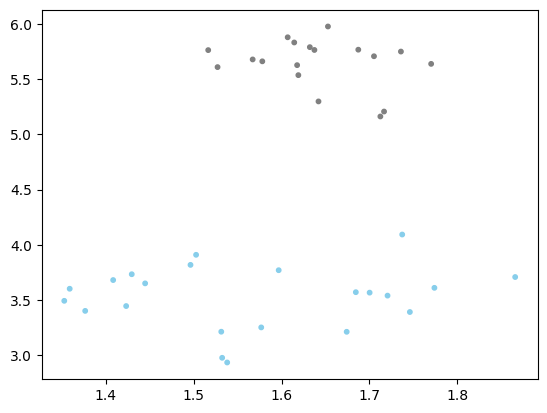

In [25]:
%matplotlib inline

X = torch.stack(post_train_embed).cpu()
X_np = X.numpy()
labelsNums = post_train_label
X_embedded= TSNE(n_components=2, init='random').fit_transform(X_np)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1] , c=labelsNums[:len(X_embedded)], s=10, cmap= cc , alpha=1 )


In [26]:
def clsembed(snippet):
    inputs = tokenizer(snippet, padding='max_length', max_length=218, truncation=True, return_tensors='pt').to(device)
    #tokens = [self.tokenizer.cls_token] + inputs  + [self.tokenizer.sep_token]
    if(len(inputs)<512):
        with torch.no_grad():
            outs = model_codebert(**inputs)
        cls = outs.last_hidden_state[:, 0, :].squeeze().detach()
        return cls
    else:
        print('longtest')
        i = 0
        part_vector =  []
        while ( i < len(inputs)-200) :
            #tokens = [self.tokenizer.cls_token] + inputs[i:i+250] +[self.tokenizer.sep_token]
            #tokens_ids= self.tokenizer.convert_tokens_to_ids(tokens)
            input_seg = [tokenizer.cls_token] + inputs[i:i+250] +[tokenizer.sep_token]
            with torch.no_grad():
                ots = model_codebert(**input_seg)
            cls = ots.last_hidden_state[:, 0, :].squeeze().detach()
            #cls = model_codebert(torch.tensor(inputs)[None,:])[1]
            #vector = cls[0].detach().numpy()
            parts.append(cls)
            i = i+100
        return parts

In [27]:
import numpy as np
from numpy import dot
from numpy.linalg import norm
#labels_all = ['async wait','unordered collections','concurrency','time']
def get_class_rep(post_train_embed, post_train_label):
    # Move each tensor to CPU, convert to numpy, and collect in a list
    #post_train_embed = [x.cpu().numpy() for x in post_train_embed]
    # If you want to combine them into a single array (assuming they have the same shape)
    #post_train_embed = np.concatenate(post_train_embed, axis=0)
    representatives = [None] * 2
    for label in range(2):
        indices = np.where(np.atleast_1d(post_train_label) == label)[0]  # Get the indices as an array
        class_vectors = [post_train_embed[i] for i in indices]  # Access each index individually
        class_vectors = [x.cpu().numpy() for x in class_vectors]
        representatives[label] = np.mean(class_vectors, axis=0)
    return representatives

def calculate_normalized_distance(vec1, vec2):
    # Ensure vec1 and vec2 are numpy arrays
    if not isinstance(vec1, np.ndarray):
        vec1 = vec1.cpu().detach().numpy()
    if not isinstance(vec2, np.ndarray):
        vec2 = vec2.cpu().detach().numpy()
    
    # Normalize each vector to have unit length
    norm_vec1 = vec1 / np.linalg.norm(vec1)
    norm_vec2 = vec2 / np.linalg.norm(vec2)
    
    # Calculate Euclidean (L2) distance between the normalized vectors
    distance = np.linalg.norm(norm_vec1 - norm_vec2)
    
    return distance


In [28]:
int_to_label={
    0: 'NIO',
    1: 'NDOD'
    }


def get_closest_cluster(cluster_representatives, projected_vector):
    distances = [calculate_normalized_distance(rep, projected_vector) for rep in cluster_representatives]
    for i in range(len(distances)):
        distances[i] = np.mean(distances[i])
    closest_cluster_idx = np.argmin(distances)
    return int_to_label[closest_cluster_idx]

In [29]:
embed = post_train_embed
labels = post_train_label
def predict(input_vector):
    modified_vector = siamese_network(input_vector)
    representatives = get_class_rep(embed, labels)
    return get_closest_cluster(representatives, modified_vector)
    


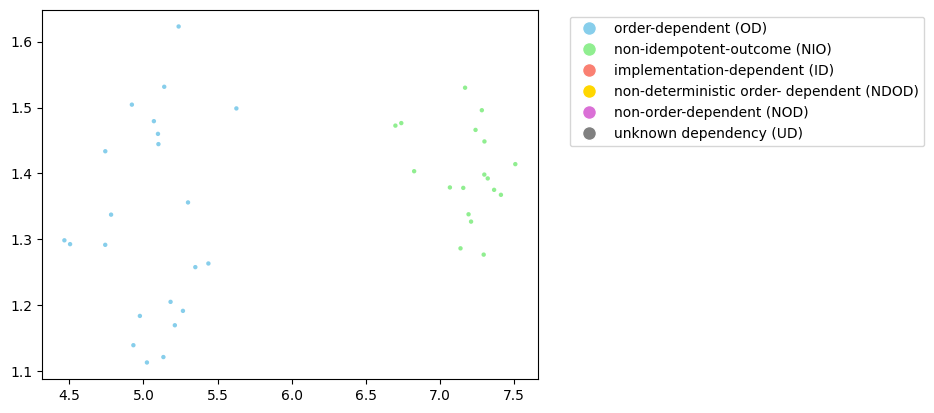

In [30]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import torch

# Assuming post_train_embed and post_train_label are defined
X = torch.stack(post_train_embed).cpu()
X_np = X.numpy()
labelsNums = post_train_label

# Define vibrant colors for each category (same as used in the bar plot)
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'orchid', 'grey']

# Ensure labels are within the range of colors [0, 1, 2, 3, 4]
# Filter out invalid labels (-1) and keep only valid labels [0, 1, 2, 3, 4]
valid_indices = [i for i, label in enumerate(labelsNums) if label in [0, 1]]
X_np_filtered = X_np[valid_indices]
labelsNums_filtered = [labelsNums[i] for i in valid_indices]

# Dimensionality reduction with t-SNE
X_embedded = TSNE(n_components=2, init='random').fit_transform(X_np_filtered)

# Scatter plot
for i, label in enumerate(labelsNums_filtered):
    plt.scatter(X_embedded[i, 0], X_embedded[i, 1], color=colors[label], s=10, alpha=1, edgecolor='none', marker='o')

# Create legend with category labels
legend_labels = ['order-dependent (OD)', 'non-idempotent-outcome (NIO)', 'implementation-dependent (ID)', 'non-deterministic order- dependent (NDOD)', 'non-order-dependent (NOD)', 'unknown dependency (UD)']
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors], labels=legend_labels,bbox_to_anchor=(1.05, 1), 
                    loc='upper left')

plt.show()


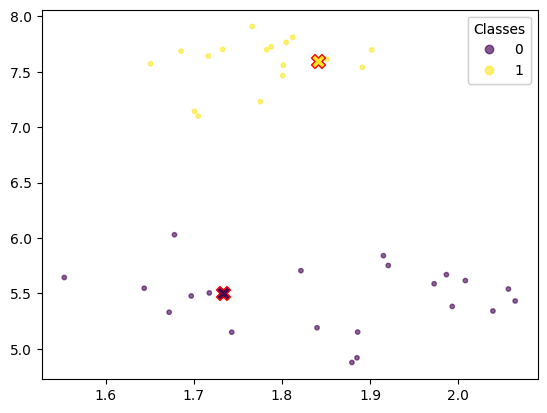

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
import torch

# Assuming post_train_embed, post_train_label, and labelsNums are defined
X = torch.stack(post_train_embed).cpu()
X_np = X.numpy()
X_embedded = TSNE(n_components=2, init='random').fit_transform(X_np)

# Plot the data points
scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labelsNums[:len(X_embedded)], s=10, cmap='viridis', alpha=0.6)

# Calculate class representatives
representatives = get_class_rep(post_train_embed, post_train_label)  # Make sure this function returns what you expect

# Get unique labels and their colors from the scatter plot
unique_labels = np.unique(labelsNums[:len(X_embedded)])
legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
plt.gca().add_artist(legend1)

# For each class representative, find the closest point and plot it
for i, rep in enumerate(representatives):
    if rep is not None:
        # Find the closest data point in the original space to this representative
        distances = np.linalg.norm(X_np - rep, axis=1)
        closest_point_index = np.argmin(distances)
        # Use the label of the closest data point to get the correct color
        label_of_closest = labelsNums[closest_point_index]
        color = scatter.cmap(scatter.norm(label_of_closest))
        plt.scatter(X_embedded[closest_point_index, 0], X_embedded[closest_point_index, 1], color=color, edgecolors='red', s=100, marker='X')

# You might want to adjust the legend to make sure it correctly represents your data
# plt.legend()
plt.show()


In [32]:
# from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# # Assuming 'X_embedded' is your t-SNE result and 'labelsNums' are your labels

# # Silhouette Score:
# # - Measures how similar an object is to its own cluster compared to other clusters.
# # - Range: -1 (incorrect clustering) to 1 (highly dense clustering). 
# #   A score close to 1 means that the clusters are well separated and clearly defined.
# silhouette_avg = silhouette_score(X_embedded, labelsNums[:len(X_embedded)])
# print(f"Silhouette Score: {silhouette_avg}")

# # Davies-Bouldin Index:
# # - Evaluates the clustering quality by measuring the average 'similarity' between each cluster 
# #   and its most similar one. The similarity is based on a ratio of within-cluster distances to between-cluster distances.
# # - Range: 0 to +∞. Lower scores indicate better clustering quality.
# davies_bouldin = davies_bouldin_score(X_embedded, labelsNums[:len(X_embedded)])
# print(f"Davies-Bouldin Index: {davies_bouldin}")

# # Calinski-Harabasz Index:
# # - Measures the cluster validity based on the ratio between the within-cluster dispersion and the between-cluster dispersion.
# # - Range: Higher values indicate better clustering quality, with no upper limit. Low values indicate clusters with high overlap.
# calinski_harabasz = calinski_harabasz_score(X_embedded, labelsNums[:len(X_embedded)])
# print(f"Calinski-Harabasz Index: {calinski_harabasz}")


In [33]:
from sklearn.metrics import f1_score
 # Create reverse mapping

count = 0

# Assuming val_dataset is iterable and has 'anchor' and 'label' keys
predicted_labels = []
true_labels = []

for item in val_dataset:
    count += 1
    input_vector = item['anchor']  # Your input vector for prediction
    
    # Get predicted cluster/label
    predicted_label_str = predict(input_vector)
    
    # Ensure predicted_label is in the valid range
    if predicted_label_str in label_to_int:
        predicted_label = label_to_int[predicted_label_str]
        predicted_labels.append(predicted_label)
    else:
        print(f"Warning: Encountered unknown predicted label {predicted_label_str}")
        continue

    # True label
    true_label_int = int(item['label'])  # Assuming 'label' contains the true label as integer
    if true_label_int in int_to_label:
        true_labels.append(true_label_int)
    else:
        print(f"Warning: Encountered unknown true label {true_label_int}")
        continue

    print(count, "Predicted:", predicted_label, "True:", true_label_int)

# Filter out any invalid entries where predicted or true labels are missing
valid_indices = [i for i in range(len(true_labels)) if true_labels[i] in int_to_label and predicted_labels[i] in int_to_label]
filtered_true_labels = [true_labels[i] for i in valid_indices]
filtered_predicted_labels = [predicted_labels[i] for i in valid_indices]

print("Loop completed")

# Calculate F1 Score, ignoring unknown labels
f1 = f1_score(filtered_true_labels, filtered_predicted_labels, average='weighted', zero_division=0)  # Adjust 'average' as necessary
print(f"F1 Score: {f1}")


1 Predicted: 0 True: 0
2 Predicted: 0 True: 0
3 Predicted: 0 True: 0
4 Predicted: 0 True: 0
5 Predicted: 0 True: 0
6 Predicted: 1 True: 1
7 Predicted: 1 True: 1
8 Predicted: 1 True: 1
9 Predicted: 1 True: 1
10 Predicted: 0 True: 0
11 Predicted: 0 True: 1
Loop completed
F1 Score: 0.9075369075369075


              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.80      0.89         5

    accuracy                           0.91        11
   macro avg       0.93      0.90      0.91        11
weighted avg       0.92      0.91      0.91        11


 - Accuracy :  0.91
 - Precision :  0.92
 - Recall :  0.91
 - F1 score :  0.91
 - MCC :  0.83
 - AUC :  0.9


Performances by categories



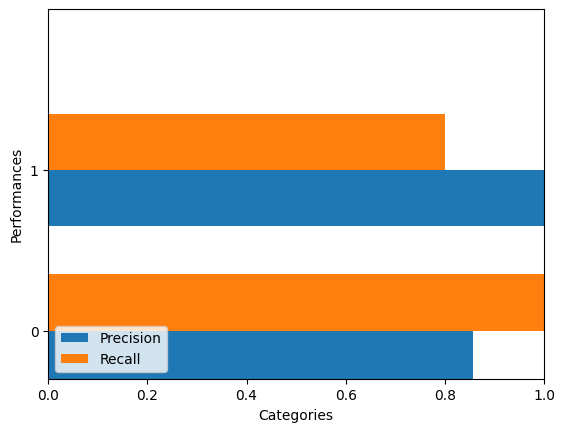



Confusion Matrix 


<AxesSubplot:>

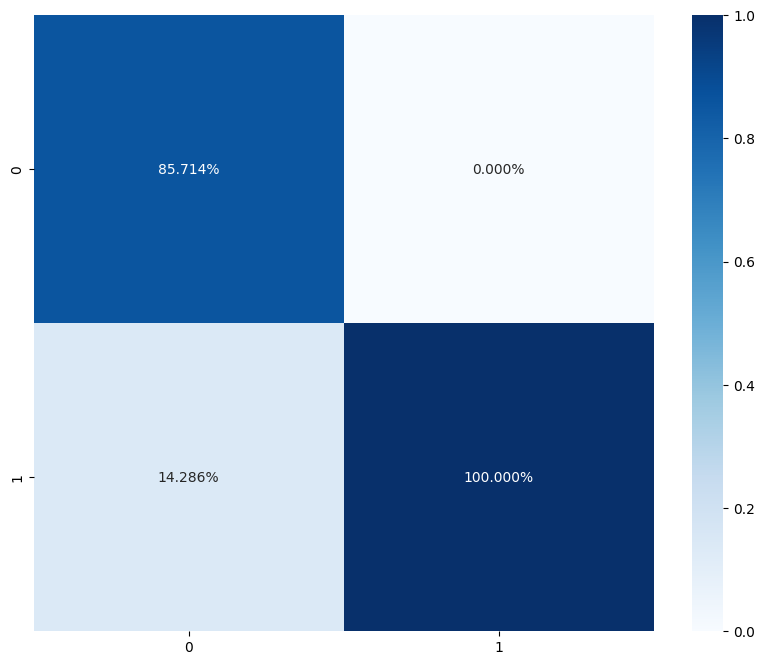

In [34]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn import metrics
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

%matplotlib inline
warnings.filterwarnings("ignore")

def multiclass_roc_auc_score(truth, pred, average="weighted"):
    lb = LabelBinarizer()
    lb.fit(truth)
    truth = lb.transform(truth)
    pred = lb.transform(pred)
    return roc_auc_score(truth, pred, average=average)

# Assuming predicted_labels and true_labels are already defined
predicted = predicted_labels
labels = true_labels

# Filter out 'unknown' labels
valid_indices = [i for i, label in enumerate(labels) if label != 'unknown']
filtered_labels = [labels[i] for i in valid_indices]
filtered_predicted = [predicted[i] for i in valid_indices]

unique_labels = list(set(filtered_labels))
print(classification_report(filtered_labels, filtered_predicted))



print('\n - Accuracy : ', np.round(metrics.accuracy_score(filtered_labels, filtered_predicted), 2))
print(' - Precision : ', np.round(metrics.precision_score(filtered_labels, filtered_predicted, average='weighted'), 2))
print(' - Recall : ', np.round(metrics.recall_score(filtered_labels, filtered_predicted, average='weighted'), 2))
print(' - F1 score : ', np.round(metrics.f1_score(filtered_labels, filtered_predicted, average='weighted'), 2))
print(' - MCC : ', np.round(metrics.matthews_corrcoef(filtered_labels, filtered_predicted), 2))
print(' - AUC : ', np.round(multiclass_roc_auc_score(filtered_labels, filtered_predicted), 2))

print("\n\nPerformances by categories\n")

ind = np.arange(len(unique_labels)) 
width = 0.35
fig, ax = plt.subplots()
precision = metrics.precision_recall_fscore_support(filtered_labels, filtered_predicted, labels=unique_labels)[0]
recall = metrics.precision_recall_fscore_support(filtered_labels, filtered_predicted, labels=unique_labels)[1]
ax.barh(ind - width/2, precision, width, label='Precision')
ax.barh(ind + width/2, recall, width, label='Recall')
ax.set(yticks=ind, yticklabels=np.array(unique_labels), ylim=[2*width - 1, len(ind)])
plt.xlim(0, 1)
ax.legend(loc='lower left')
ax.set_ylabel("Performances")
ax.set_xlabel("Categories")
plt.show()

print("\n\nConfusion Matrix ")

mat = confusion_matrix(filtered_labels, filtered_predicted, labels=unique_labels)
df_cm = pd.DataFrame(mat, index=[i for i in unique_labels], columns=[i for i in unique_labels])
plt.figure(figsize=(10, 8))
sn.heatmap(df_cm / np.sum(df_cm), annot=True, fmt='.3%', cmap='Blues')


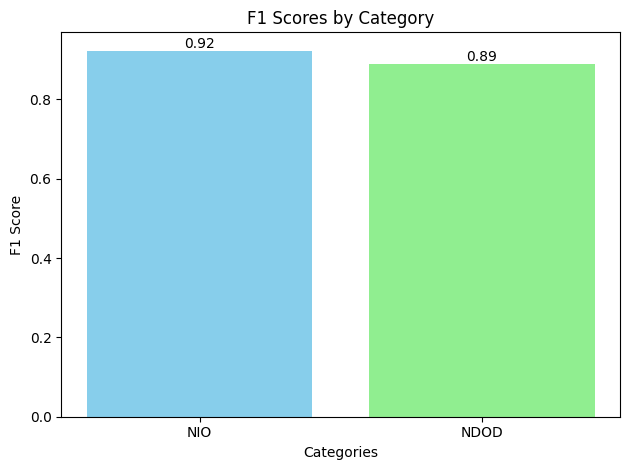

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
shortened_labels = {
    'OD': 'OD',
    'NIO': 'NIO',
    'ID': 'ID',
    'NDOD': 'NDOD',
    'NOD': 'NOD',
    'UD': 'UD'
}
# Assuming you have the predicted and true labels as per your previous code
# predicted_labels and true_labels should be lists of labels
# Filter out invalid labels from both true and predicted labels
valid_indices = [i for i in range(len(true_labels)) if true_labels[i] in int_to_label.keys() and predicted_labels[i] in int_to_label.keys()]
filtered_true_labels = [true_labels[i] for i in valid_indices]
filtered_predicted_labels = [predicted_labels[i] for i in valid_indices]

# Calculate F1 scores for each category
f1_scores = []
categories = list(int_to_label.keys())
for category in categories:
    true_bin = [1 if label == category else 0 for label in filtered_true_labels]
    pred_bin = [1 if label == category else 0 for label in filtered_predicted_labels]
    f1 = f1_score(true_bin, pred_bin, zero_division=0)
    f1_scores.append(f1)

# Define vibrant colors for each category
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'orchid', 'grey']

# Create bar plot with shortened category names and vibrant colors
shortened_categories = [shortened_labels[int_to_label[category]] for category in categories]
fig, ax = plt.subplots()
bars = ax.bar(shortened_categories, f1_scores, color=colors)

# Add F1 scores on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 0),  
                textcoords="offset points", ha='center', va='bottom')

# Customize the plot
ax.set_xlabel('Categories')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Scores by Category')

# Display the plot
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [36]:
# file_path = 'test_data_predictions.csv'

# # Load the compressed CSV file into a DataFrame
# df = pd.read_csv(file_path)

# # Extract the 'TrueLabel' and 'PredictedLabel' columns into separate variables
# labels_flaky = df['TrueLabel'].tolist()
# predicted_flaky = df['PredictedLabel'].tolist()

# print (classification_report(labels, predicted))

# print('\n - Accuracy : ' , np.round( metrics.accuracy_score(labels_flaky,  predicted_flaky) , 2))
# print(' - Precision : ' , np.round( metrics.precision_score(labels_flaky,  predicted_flaky , average='weighted') , 2))
# print(' - Recall : ' , np.round( metrics.recall_score(labels_flaky,  predicted_flaky , average='weighted') , 2))
# print(' - F1 score : ' , np.round( metrics.f1_score(labels_flaky,  predicted_flaky , average='weighted') , 2))
# print(' - MCC : ' , np.round( metrics.matthews_corrcoef(labels_flaky,  predicted_flaky) , 2))
# print(' - AUC : ' , np.round( multiclass_roc_auc_score(labels_flaky,  predicted_flaky),2) )

# print("\n\nPerfomnaces by categories\n")


# ind = np.arange(len(unique_labels)) 
# width = 0.35
# fig, ax = plt.subplots()
# precision = metrics.precision_recall_fscore_support(labels_flaky,  predicted_flaky ,  labels=unique_labels )[0]
# recall = metrics.precision_recall_fscore_support(labels_flaky,  predicted_flaky ,  labels=unique_labels )[1]
# ax.barh(ind - width/2, precision, width, label='Precision')
# ax.barh(ind + width/2, recall, width, label='Recall')
# ax.set(yticks=ind + width, yticklabels=np.array(unique_labels),
# ylim=[2*width - 1, len(ind)])
# plt.xlim(0,1)
# ax.legend(loc='upper right')
# ax.set_xlabel("Performances")
# ax.set_ylabel("Categories")
# plt.show()

# print("\n\nConfusion Matrix ")

# mat = confusion_matrix(labels_flaky,  predicted_flaky, labels=unique_labels)
# df_cm = pd.DataFrame(mat, index = [i for i in unique_labels], columns = [i for i in unique_labels])
# plt.figure(figsize = (10,8))
# sn.heatmap(df_cm/np.sum(df_cm), annot=True, fmt='.3%', cmap='Blues')

In [37]:
# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn import metrics

# precision_our_model = metrics.precision_recall_fscore_support(labels, predicted, labels=unique_labels)[0]
# recall_our_model = metrics.precision_recall_fscore_support(labels, predicted, labels=unique_labels)[1]
# # And assuming 'unique_labels' is defined as before

# ind = np.arange(len(unique_labels))  # the x locations for the groups
# width = 0.2  # the width of the bars

# fig, ax = plt.subplots(figsize=(14, 10))  # Adjust the figure size as needed

# # Using a set of contrasting, darker colors
# colors = ['blue', 'green', 'red', 'orange']

# # Plotting Precision and Recall for Your Model
# rects1 = ax.bar(ind - width*1.5, precision_our_model, width, label='Our Precision', color=colors[0])
# rects2 = ax.bar(ind - width/2, recall_our_model, width, label='Our Recall', color=colors[1])

# # Plotting Precision and Recall for Flaky Model
# rects3 = ax.bar(ind + width/2, precision_flaky, width, label='FlakyCat Precision', color=colors[2])
# rects4 = ax.bar(ind + width*1.5, recall_flaky, width, label='FlakyCat Recall', color=colors[3])

# # Add some text for labels, title, and custom x-axis tick labels, etc.
# ax.set_ylabel('Scores')
# ax.set_title('Class-wise Precision and Recall for Our Model vs. FlakyCat Model')
# ax.set_xticks(ind)
# ax.set_xticklabels(unique_labels, rotation=45, ha="right")  # Rotate for better label visibility
# ax.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place the legend outside the figure

# # Optional: Adding scores above bars
# ax.bar_label(rects1, padding=3, fmt='%.2f')
# ax.bar_label(rects2, padding=3, fmt='%.2f')
# ax.bar_label(rects3, padding=3, fmt='%.2f')
# ax.bar_label(rects4, padding=3, fmt='%.2f')

# fig.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the rect to make space for the legend outside

# plt.show()


In [38]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Assuming metrics have been calculated and stored in variables for both models.
# # Example metric variables: accuracy, precision, recall, f1_score, mcc, auc for the original model
# # And similarly named variables with a '_flaky' suffix for the comparison model.

# metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC', 'AUC']
# your_model_metrics = [
#     np.round(metrics.accuracy_score(labels, predicted), 2),
#     np.round(metrics.precision_score(labels, predicted, average='weighted'), 2),
#     np.round(metrics.recall_score(labels, predicted, average='weighted'), 2),
#     np.round(metrics.f1_score(labels, predicted, average='weighted'), 2),
#     np.round(metrics.matthews_corrcoef(labels, predicted), 2),
#     np.round(multiclass_roc_auc_score(labels, predicted), 2)
# ]

# flaky_model_metrics = [
#     np.round(metrics.accuracy_score(labels_flaky, predicted_flaky), 2),
#     np.round(metrics.precision_score(labels_flaky, predicted_flaky, average='weighted'), 2),
#     np.round(metrics.recall_score(labels_flaky, predicted_flaky, average='weighted'), 2),
#     np.round(metrics.f1_score(labels_flaky, predicted_flaky, average='weighted'), 2),
#     np.round(metrics.matthews_corrcoef(labels_flaky, predicted_flaky), 2),
#     np.round(multiclass_roc_auc_score(labels_flaky, predicted_flaky), 2)
# ]

# x = np.arange(len(metrics_labels))  # the label locations
# width = 0.35  # the width of the bars

# fig, ax = plt.subplots()
# rects1 = ax.bar(x - width/2, your_model_metrics, width, label='Our Model')
# rects2 = ax.bar(x + width/2, flaky_model_metrics, width, label='FlakyCat Model')

# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Scores')
# ax.set_title('Metrics Comparison between Our Model and FlakyCat Model')
# ax.set_xticks(x)
# ax.set_xticklabels(metrics_labels)
# ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

# fig.tight_layout()

# plt.show()


In [39]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score
# def extract_projections(siamese_network, dataloader):
#     projections = []
#     labels = []
#     for batch in dataloader:
#         label = batch["label"]
#         anchor = batch["anchor"]
#         projection = siamese_network(anchor)
        
#         projections.append(projection.cpu().detach().numpy())
#         labels.append(label.numpy())
#     projections = np.vstack(projections)
#     labels = np.hstack(labels)
#     return projections, labels

In [40]:
# projections, labels = extract_projections(siamese_network, train_dataloader)
# val_projections, val_labels = extract_projections(siamese_network, val_dataloader)

In [41]:
# print(len(projections), len(train_dataloader))

In [42]:
# rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_classifier.fit(projections, labels)

# # Train SVM Classifier
# svm_classifier = SVC(kernel='linear', random_state=42)
# svm_classifier.fit(projections, labels)

In [43]:
# # Evaluate Random Forest Classifier
# rf_predictions = rf_classifier.predict(val_projections)
# rf_accuracy = accuracy_score(val_labels, rf_predictions)
# rf_f1 = f1_score(val_labels, rf_predictions, average='weighted')
# print(f"Random Forest Classifier Accuracy: {rf_accuracy}, F1: {rf_f1}")

# # Evaluate SVM Classifier
# svm_predictions = svm_classifier.predict(val_projections)
# svm_accuracy = accuracy_score(val_labels, svm_predictions)
# svm_f1 = f1_score(val_labels, svm_predictions, average='weighted')
# print(f"SVM Classifier Accuracy: {svm_accuracy}, F1:{svm_f1}")